## Proyecto 3. Entrega 1
### Analsisis Exploratorio Violencia Intrafamiliar 
Diego Duarte 22075 - José Marchena 22398 - Andrés Kou 22305 - Esteban Zambrano 22119

In [136]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
import statsmodels.api as sm
import os

In [137]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Analisis de Variables

In [138]:
path = "./data/vif"
files = os.listdir(path)
print("Archivos en la carpeta:", files)

dfs = {file[:-4]: pd.read_csv(os.path.join(path, file)) for file in files if file.endswith(".csv")}

Archivos en la carpeta: ['VifAlfa.csv', 'VifAreaSexoEdad.csv', 'VifEscolaridad.csv', 'VifPuebloSexoRelacion.csv']


#### Función para clasificar tipo de variable

In [139]:
def describir_dataset(df, nombre):
    print(f"\nAnálisis del dataset: {nombre}")
    print(f"Dimensiones: {df.shape[0]} filas, {df.shape[1]} columnas\n")
    
    tipos = df.dtypes
    resumen = []
    
    for col in df.columns:
        tipo = tipos[col]
        unicos = df[col].nunique()
        if tipo in ['int64', 'float64']:
            if unicos <= 20:
                clasificacion = "Categórica (númerica)"
            else:
                clasificacion = "Cuantitativa"
        else:
            clasificacion = "Categórica"
        resumen.append((col, tipo, unicos, clasificacion))
    
    resumen_df = pd.DataFrame(resumen, columns=["Variable", "Tipo (dtype)", "Valores únicos", "Clasificación"])
    display(resumen_df)

for nombre, df in dfs.items():
    describir_dataset(df, nombre)



Análisis del dataset: VifAlfa
Dimensiones: 832 filas, 8 columnas



,Variable,Tipo (dtype),Valores únicos,Clasificación
0,Grupos de edad,object,35,Categórica
1,Total,object,580,Categórica
2,Alfabeta,object,555,Categórica
3,Analfabeta,object,337,Categórica
4,Ignorado,object,68,Categórica
5,Sexo,object,2,Categórica
6,Victima o Agresor,object,2,Categórica
7,Anio,int64,13,Categórica (númerica)



Análisis del dataset: VifAreaSexoEdad
Dimensiones: 452 filas, 15 columnas



,Variable,Tipo (dtype),Valores únicos,Clasificación
0,Grupos quinquenales de edad,object,24,Categórica
1,Total,int64,401,Cuantitativa
2,TotalH,object,358,Categórica
3,TotalM,int64,356,Cuantitativa
4,Urban,int64,381,Cuantitativa
5,UrbanH,int64,315,Cuantitativa
6,UrbanM,int64,329,Cuantitativa
7,Rural,object,372,Categórica
8,RuralH,object,294,Categórica
9,RuralM,object,307,Categórica



Análisis del dataset: VifEscolaridad
Dimensiones: 876 filas, 11 columnas



,Variable,Tipo (dtype),Valores únicos,Clasificación
0,Grupo de edades,object,33,Categórica
1,Total,object,574,Categórica
2,Ninguno,object,338,Categórica
3,Primaria,object,452,Categórica
4,Básico,object,297,Categórica
5,Diversificado,object,311,Categórica
6,Universitario,object,146,Categórica
7,Ignorado,object,161,Categórica
8,Sexo,object,2,Categórica
9,Victima o Agresor,object,2,Categórica



Análisis del dataset: VifPuebloSexoRelacion
Dimensiones: 260 filas, 11 columnas



,Variable,Tipo (dtype),Valores únicos,Clasificación
0,Relacion,object,10,Categórica
1,Total,int64,229,Cuantitativa
2,Ladinos(as),int64,217,Cuantitativa
3,Mayas,int64,190,Cuantitativa
4,Garífunas,object,21,Categórica
5,Xinkas,object,24,Categórica
6,Otro,object,51,Categórica
7,No indica,int64,137,Cuantitativa
8,Ignorado,object,69,Categórica
9,Sexo,object,2,Categórica


### Prueba de Normalidad

In [140]:
columnas_a_convertir = {
    "VifAlfa": ["Total", "Alfabeta", "Analfabeta", "Ignorado"],
    "VifAreaSexoEdad": ["Total", "UrbanM", "UrbanH", "Rural", "RuralM", "RuralH", "Ignorado", "IgnoradoH", "IgnoradoM", "TotalH"],
    "VifEscolaridad": ["Total", "Ninguno", "Primaria", "Básico", "Diversificado", "Universitario", "Ignorado"],
    "VifPuebloSexoRelacion": ["Garífunas", "Xinkas", "Otro", "Ignorado"]
}

for name, df in dfs.items():
    if name in columnas_a_convertir:
        columnas = columnas_a_convertir[name] 

        # Reemplazar '-' por NaN antes de la conversión
        df[columnas] = df[columnas].replace("-", 0)

        # Convertir a numérico solo las columnas seleccionadas
        df[columnas] = df[columnas].apply(pd.to_numeric, errors="coerce")

        print(f"✅ {name}: Columnas convertidas a numérico -> {columnas}")

✅ VifAlfa: Columnas convertidas a numérico -> ['Total', 'Alfabeta', 'Analfabeta', 'Ignorado']
✅ VifAreaSexoEdad: Columnas convertidas a numérico -> ['Total', 'UrbanM', 'UrbanH', 'Rural', 'RuralM', 'RuralH', 'Ignorado', 'IgnoradoH', 'IgnoradoM', 'TotalH']
✅ VifEscolaridad: Columnas convertidas a numérico -> ['Total', 'Ninguno', 'Primaria', 'Básico', 'Diversificado', 'Universitario', 'Ignorado']
✅ VifPuebloSexoRelacion: Columnas convertidas a numérico -> ['Garífunas', 'Xinkas', 'Otro', 'Ignorado']


## Graficos exploratorios VIF

#### Edad

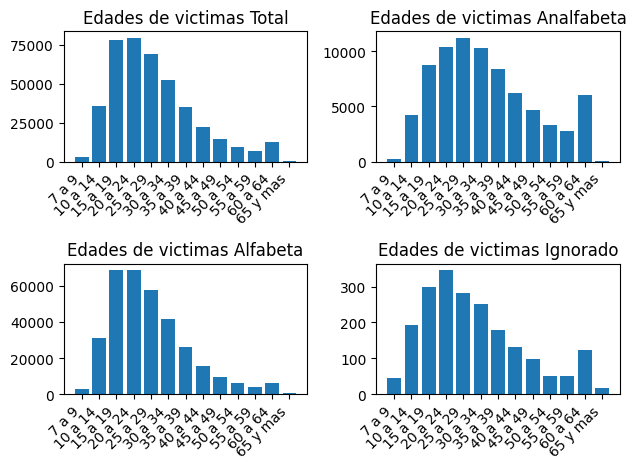

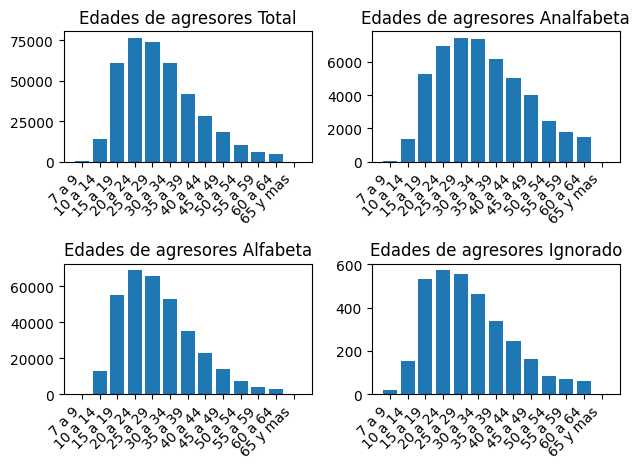

In [123]:
import warnings
warnings.simplefilter("ignore")
names = list(dfs.keys())
VifAlfa = dfs[names[0]]
t1 = VifAlfa[(VifAlfa["Grupos de edad"]!="Total") & 
             (VifAlfa["Grupos de edad"]!="Ignorado") &
             (VifAlfa["Grupos de edad"]!="Total País")]
# by_age = t1.groupby("Alfabeta")["Grupos de edad"].sum().reset_index()

t1['Grupos de edad'] = t1["Grupos de edad"].str.replace("años", "", regex=False)
t1['Grupos de edad'] = t1["Grupos de edad"].str.replace(r"\s+", " ", regex=True).str.strip()
t1.loc[t1["Grupos de edad"]=="07 a 09", "Grupos de edad"] = "7 a 9"
t1.loc[t1["Grupos de edad"]=="07 a 09", "Grupos de edad"] = "5 a 9"

def simple_ages(age):
    try:
        if int(age) >= 7 and int(age) < 10:
            return "7 a 9"
        elif int(age) >= 10 and int(age) <= 14:
            return "10 a 14"
        else:
            return age
    except:
        if int(age.split(" ")[0])<7:
            return "7 a 9"
        elif int(age.split(" ")[0])>=65:
            return "65 y mas"
        return age

t1["Grupos de edad"] = t1["Grupos de edad"].apply(simple_ages)
ages = t1["Grupos de edad"].unique() 
fig, ax1 = plt.subplots(2, 2)
tvictims = t1.copy()
tvictims = tvictims[tvictims["Victima o Agresor"]=="V"]
for i, g in enumerate(["Total","Alfabeta","Analfabeta","Ignorado"]):
    tem = tvictims.groupby("Grupos de edad")[g].sum().reset_index()
    ax1[i%2,int(i/2)].set_title(f"Edades de victimas {g}")
    ax1[i%2,int(i/2)].bar(ages,tem[g])
    ax1[i%2,int(i/2)].set_xticklabels([f"{i}" for i in ages], rotation=45, ha="right")
plt.tight_layout()
plt.show()

fig2, ax2 = plt.subplots(2, 2)
taggressor= t1.copy()
taggressor = taggressor[taggressor["Victima o Agresor"]=="A"]
for i, g in enumerate(["Total","Alfabeta","Analfabeta","Ignorado"]):
    tem = taggressor.groupby("Grupos de edad")[g].sum().reset_index()
    ax2[i%2,int(i/2)].set_title(f"Edades de agresores {g}")
    ax2[i%2,int(i/2)].bar(ages,tem[g])
    ax2[i%2,int(i/2)].set_xticklabels([f"{i}" for i in ages], rotation=45, ha="right")
plt.tight_layout()
plt.show()

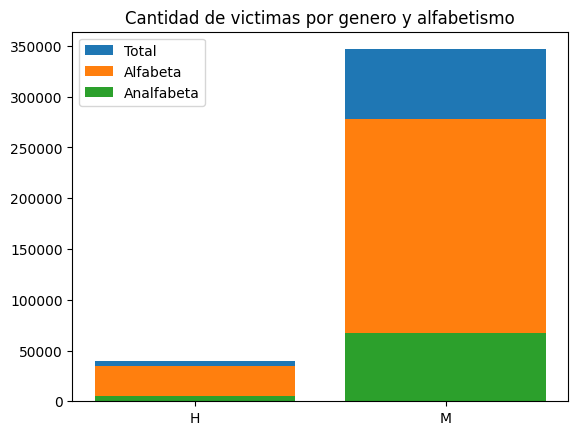

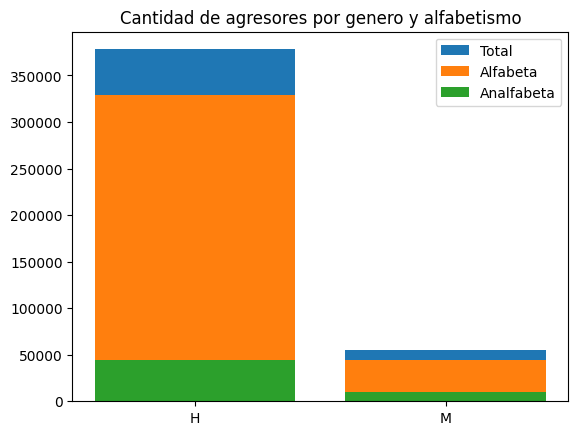

In [145]:
alf = VifAlfa.copy()
alf = alf[(alf["Grupos de edad"]=="Total")|
              (alf["Grupos de edad"]=="Todo el País")]
alf_v = alf[alf["Victima o Agresor"]=="V"]
alf_v = alf_v[["Total","Alfabeta","Analfabeta","Sexo"]]
alf_v_by_gender = alf_v.groupby("Sexo")["Total"].sum().reset_index()
for i,a in enumerate(["Total","Alfabeta","Analfabeta"]):
    tem = alf_v.groupby("Sexo")[a].sum().reset_index()
    plt.title("Cantidad de victimas por genero y alfabetismo")
    plt.bar(tem["Sexo"],tem[a],label=a)
    plt.legend()
plt.show()

alf_a = VifAlfa.copy()
alf_a = alf_a[alf_a["Victima o Agresor"]=="A"]
alf_a_total = alf_a.groupby(["Anio","Sexo"])[["Total","Alfabeta","Analfabeta"]].sum().reset_index()
alf_a_total
for i,a in enumerate(["Total","Alfabeta","Analfabeta"]):
    tem = alf_a_total.groupby("Sexo")[a].sum().reset_index()
    plt.title("Cantidad de agresores por genero y alfabetismo")
    plt.bar(tem["Sexo"],tem[a],label=a)
    plt.legend()
    


#### Relacion

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Esposos(as)'),
  Text(1, 0, 'Convivientes'),
  Text(2, 0, 'Ex cónyuges'),
  Text(3, 0, 'Otro'),
  Text(4, 0, 'Hermanos(as)'),
  Text(5, 0, 'Padres/Madres'),
  Text(6, 0, 'Hijos(as)'),
  Text(7, 0, 'Suegros(as)'),
  Text(8, 0, 'Hijastros(as)'),
  Text(9, 0, 'Nietos(as)')])

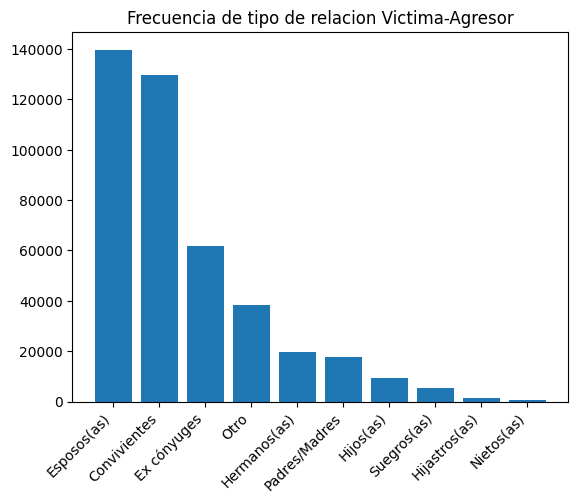

In [201]:
VifPSR = dfs[names[3]]
by_rel = VifPSR.groupby("Relacion")["Total"].sum().reset_index()
by_rel= by_rel.sort_values(by="Total",ascending=False)
plt.title("Frecuencia de tipo de relacion Victima-Agresor")
plt.bar(by_rel["Relacion"],by_rel["Total"])
plt.xticks(rotation=45,ha='right')

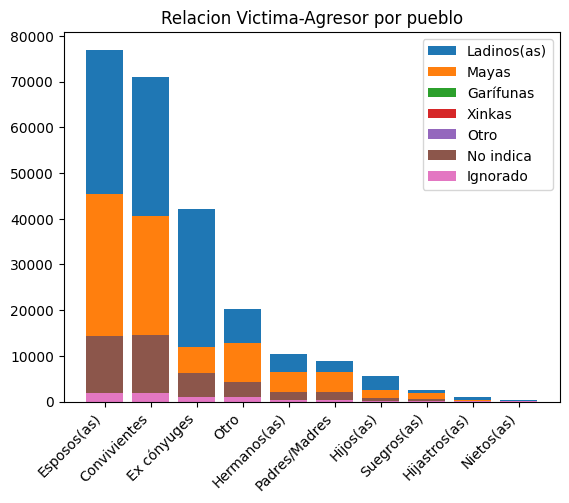

In [202]:
pueblos = list(VifPSR.columns)
pueblos = pueblos[2:]
pueblos = pueblos[:-2]
for p in pueblos:
    by_rel = VifPSR.groupby("Relacion")[p].sum().reset_index()
    by_rel= by_rel.sort_values(by=p,ascending=False)
    plt.title("Relacion Victima-Agresor por pueblo")
    plt.bar(by_rel["Relacion"],by_rel[p], label=p)
    plt.legend()
    plt.xticks(rotation=45,ha='right',)
    

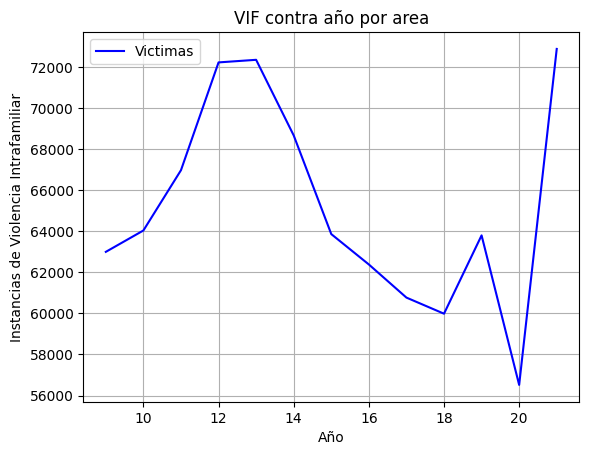

In [203]:
VifASE = dfs[names[1]]
ase_no_age = VifASE.groupby(["Anio","Victima o Agresor"])[["Total","Urban","Rural","Ignorado"]].sum().reset_index()
ase_v = ase_no_age[ase_no_age["Victima o Agresor"]=="V"]
plt.plot(ase_v["Anio"], ase_v["Total"],label='Victimas', color='blue')
plt.legend()
plt.title("VIF contra año por area")
plt.ylabel("Instancias de Violencia Intrafamiliar")
plt.xlabel("Año")
plt.grid()

********************************************************************************************

🔹 **Analizando archivo: VifAlfa**

⚠️ La columna 'Total' tiene 5 ceros en el archivo 'VifAlfa'.
Estadístico de prueba (ks_statistic) = 0.30346553309488066841
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'VifAlfa - Total' NO provienen de una distribución normal.



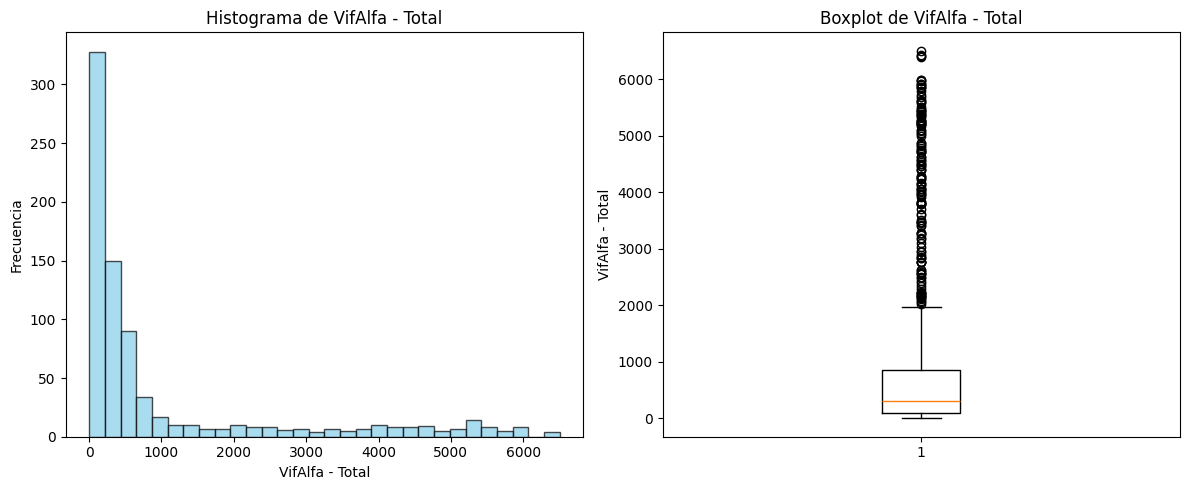

⚠️ La columna 'Alfabeta' tiene 7 ceros en el archivo 'VifAlfa'.
Estadístico de prueba (ks_statistic) = 0.31109965277739237699
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'VifAlfa - Alfabeta' NO provienen de una distribución normal.



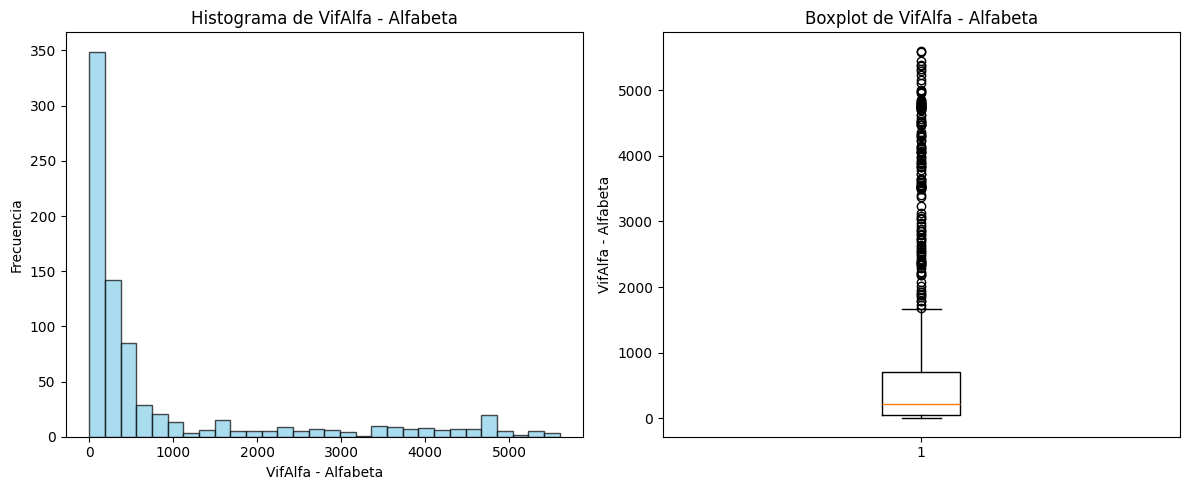

⚠️ La columna 'Analfabeta' tiene 39 ceros en el archivo 'VifAlfa'.
Estadístico de prueba (ks_statistic) = 0.26049970997823035379
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'VifAlfa - Analfabeta' NO provienen de una distribución normal.



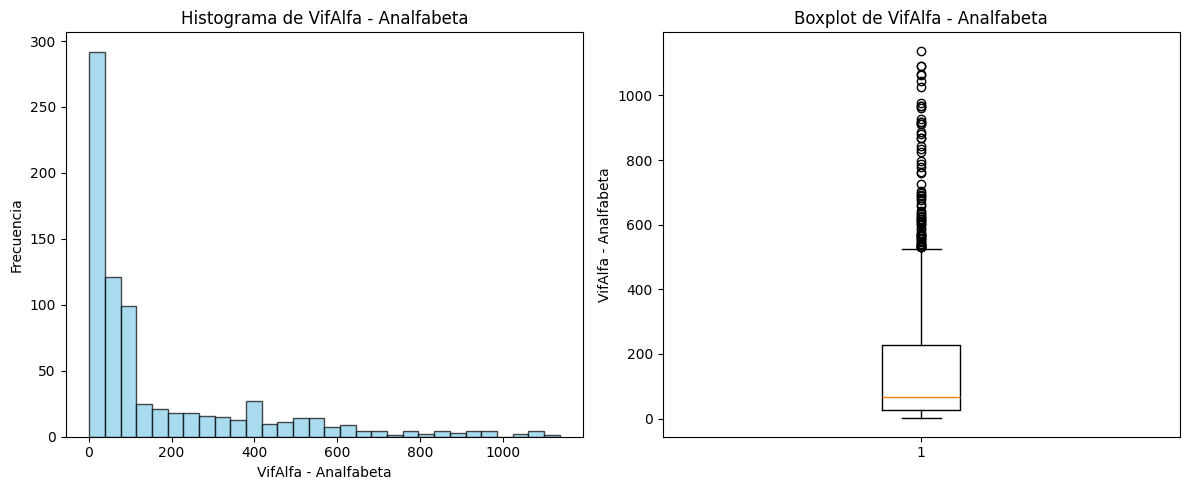

⚠️ La columna 'Ignorado' tiene 183 ceros en el archivo 'VifAlfa'.
Estadístico de prueba (ks_statistic) = 0.36361010098313217842
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'VifAlfa - Ignorado' NO provienen de una distribución normal.



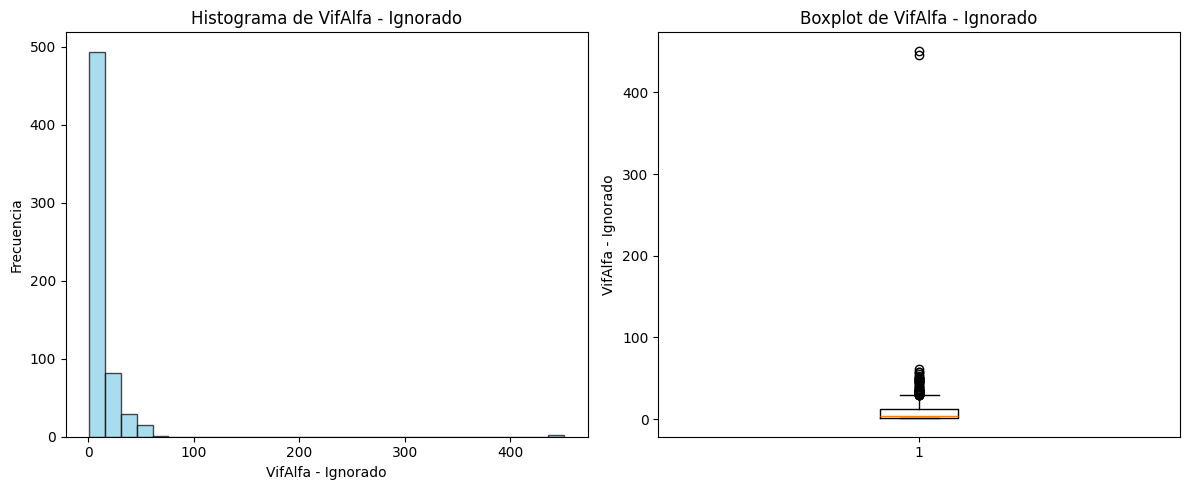

********************************************************************************************

🔹 **Analizando archivo: VifAreaSexoEdad**

Estadístico de prueba (ks_statistic) = 0.18704383510634464693
p-value = 0.00000000000014952987
Se rechaza la hipótesis nula: los datos de 'VifAreaSexoEdad - Total' NO provienen de una distribución normal.



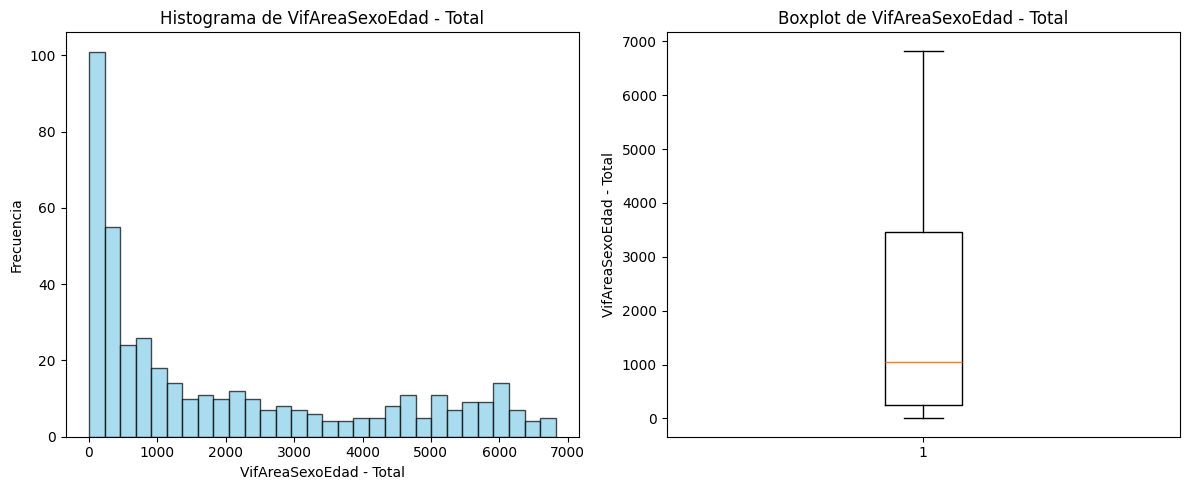

⚠️ La columna 'TotalH' tiene 1 ceros en el archivo 'VifAreaSexoEdad'.
Estadístico de prueba (ks_statistic) = 0.30045315270194727919
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'VifAreaSexoEdad - TotalH' NO provienen de una distribución normal.



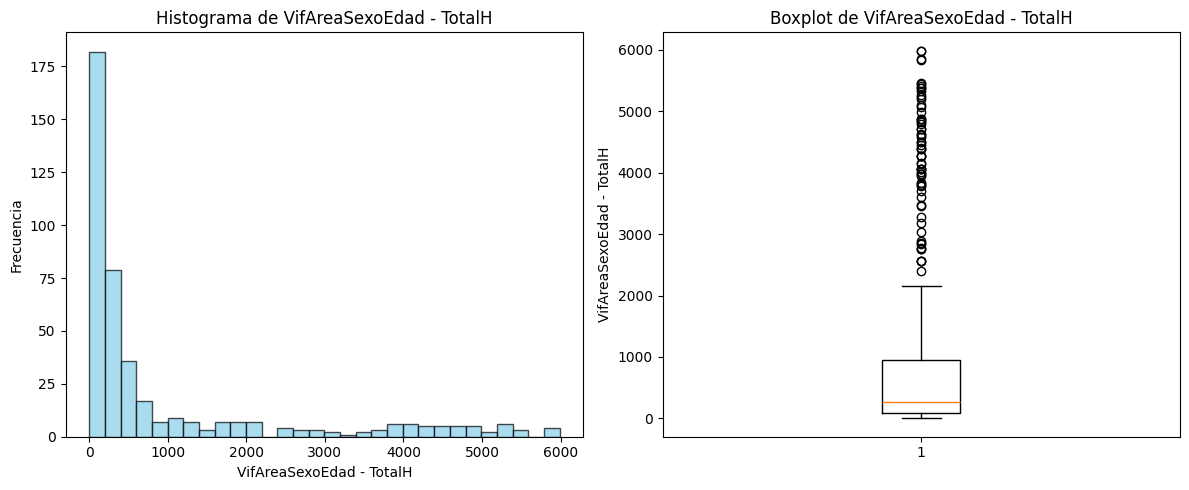

⚠️ La columna 'TotalM' tiene 4 ceros en el archivo 'VifAreaSexoEdad'.
Estadístico de prueba (ks_statistic) = 0.30695266376276220122
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'VifAreaSexoEdad - TotalM' NO provienen de una distribución normal.



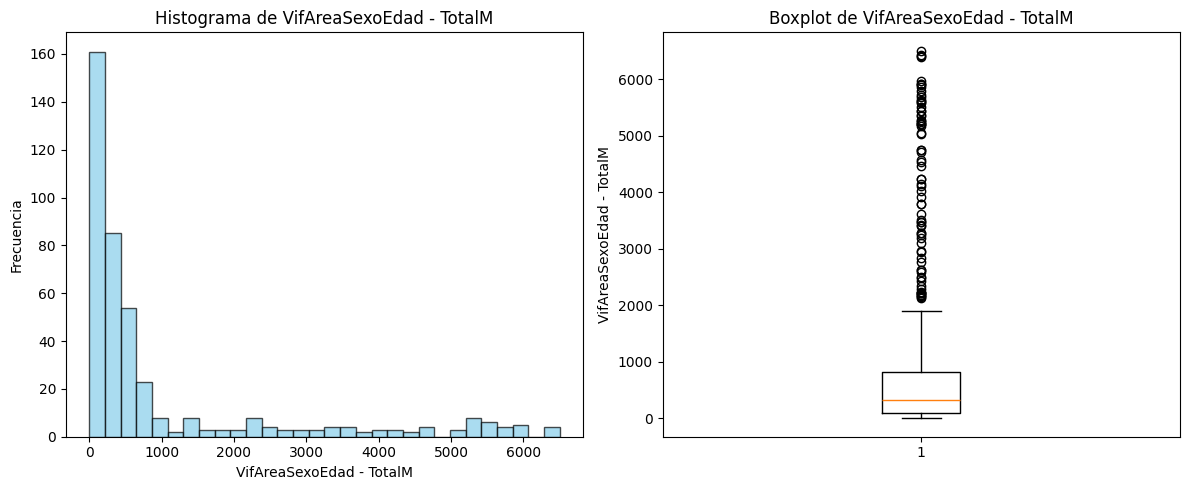

⚠️ La columna 'Urban' tiene 1 ceros en el archivo 'VifAreaSexoEdad'.
Estadístico de prueba (ks_statistic) = 0.18599368318937914424
p-value = 0.00000000000022534665
Se rechaza la hipótesis nula: los datos de 'VifAreaSexoEdad - Urban' NO provienen de una distribución normal.



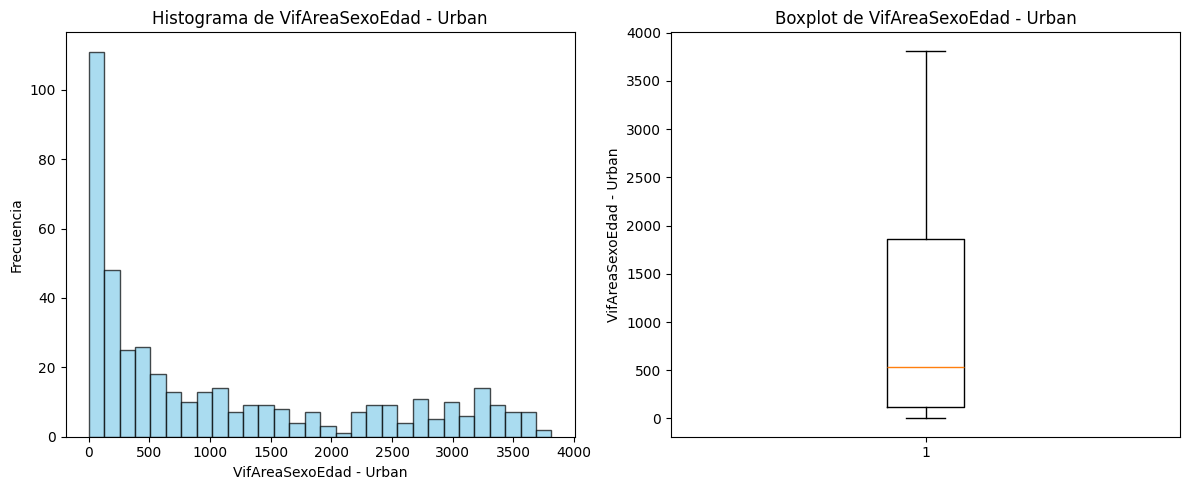

⚠️ La columna 'UrbanH' tiene 2 ceros en el archivo 'VifAreaSexoEdad'.
Estadístico de prueba (ks_statistic) = 0.30020542476148992517
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'VifAreaSexoEdad - UrbanH' NO provienen de una distribución normal.



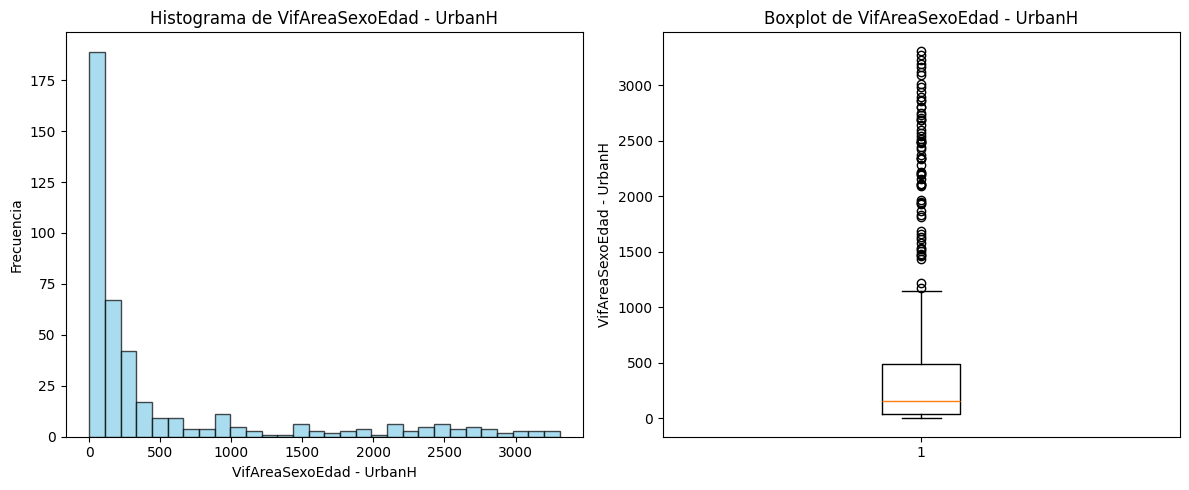

⚠️ La columna 'UrbanM' tiene 4 ceros en el archivo 'VifAreaSexoEdad'.
Estadístico de prueba (ks_statistic) = 0.30305666769737421573
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'VifAreaSexoEdad - UrbanM' NO provienen de una distribución normal.



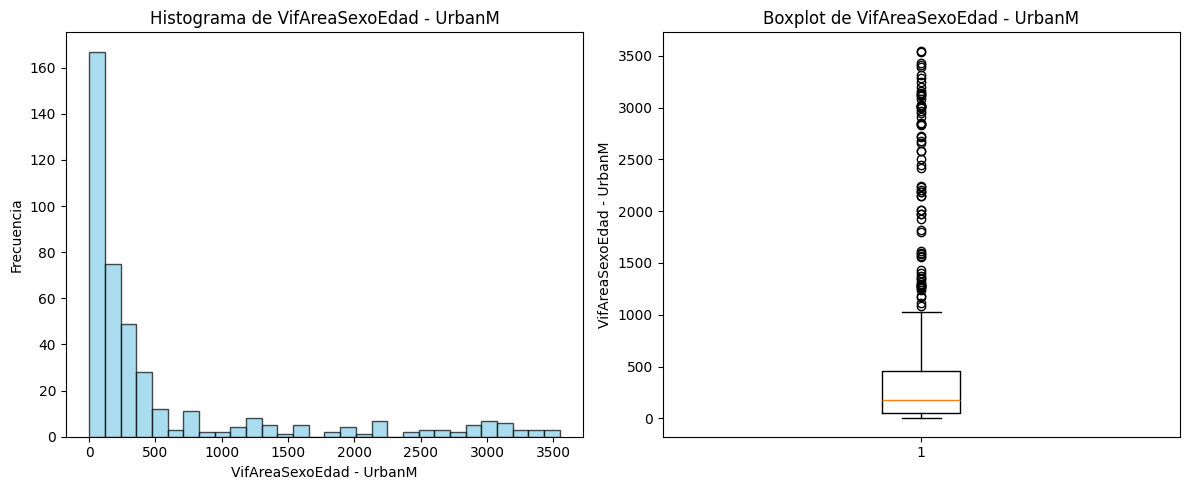

⚠️ La columna 'Rural' tiene 3 ceros en el archivo 'VifAreaSexoEdad'.
Estadístico de prueba (ks_statistic) = 0.17517289164811161717
p-value = 0.00000000000752643278
Se rechaza la hipótesis nula: los datos de 'VifAreaSexoEdad - Rural' NO provienen de una distribución normal.



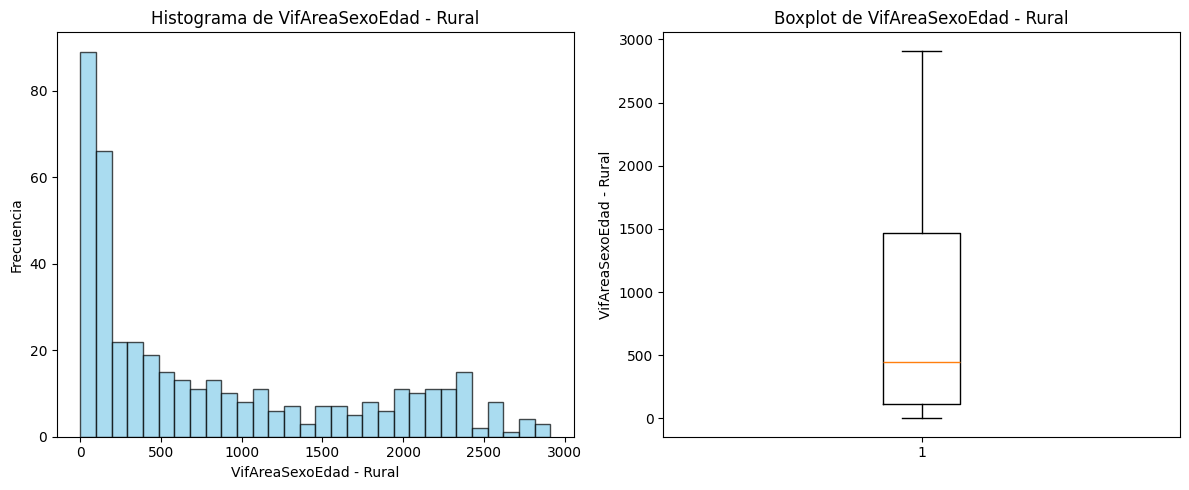

⚠️ La columna 'RuralH' tiene 3 ceros en el archivo 'VifAreaSexoEdad'.
Estadístico de prueba (ks_statistic) = 0.29471984496539871401
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'VifAreaSexoEdad - RuralH' NO provienen de una distribución normal.



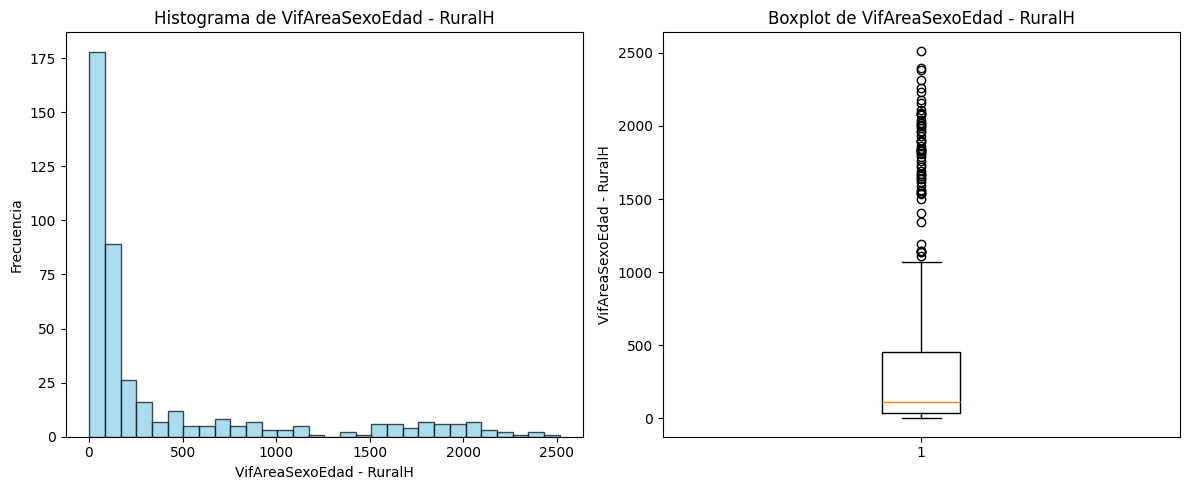

⚠️ La columna 'RuralM' tiene 8 ceros en el archivo 'VifAreaSexoEdad'.
Estadístico de prueba (ks_statistic) = 0.30771411138028303967
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'VifAreaSexoEdad - RuralM' NO provienen de una distribución normal.



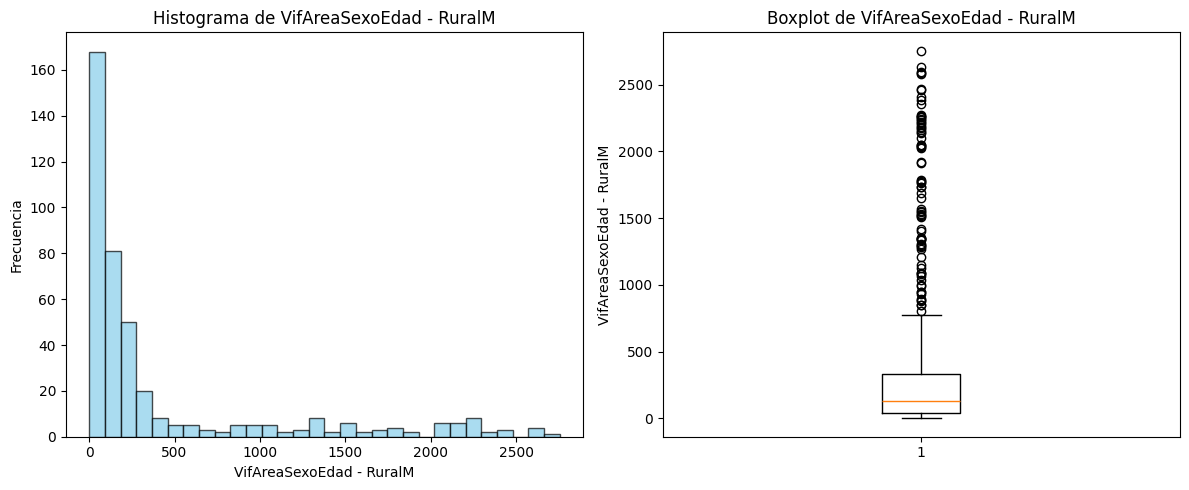

⚠️ La columna 'Ignorado' tiene 23 ceros en el archivo 'VifAreaSexoEdad'.
Estadístico de prueba (ks_statistic) = 0.21701054598410784990
p-value = 0.00000000000000003496
Se rechaza la hipótesis nula: los datos de 'VifAreaSexoEdad - Ignorado' NO provienen de una distribución normal.



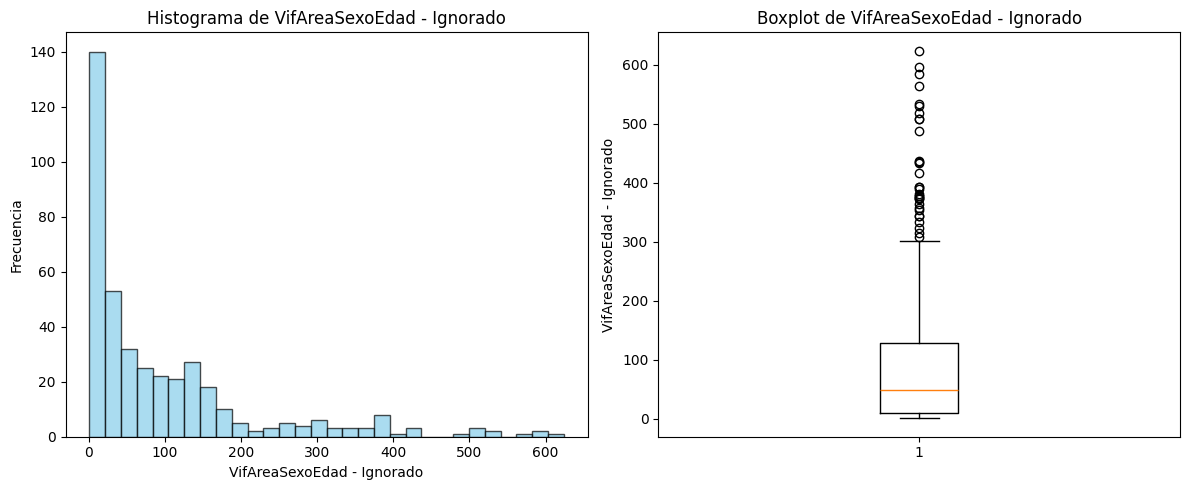

⚠️ La columna 'IgnoradoH' tiene 36 ceros en el archivo 'VifAreaSexoEdad'.
Estadístico de prueba (ks_statistic) = 0.29134308958891785846
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'VifAreaSexoEdad - IgnoradoH' NO provienen de una distribución normal.



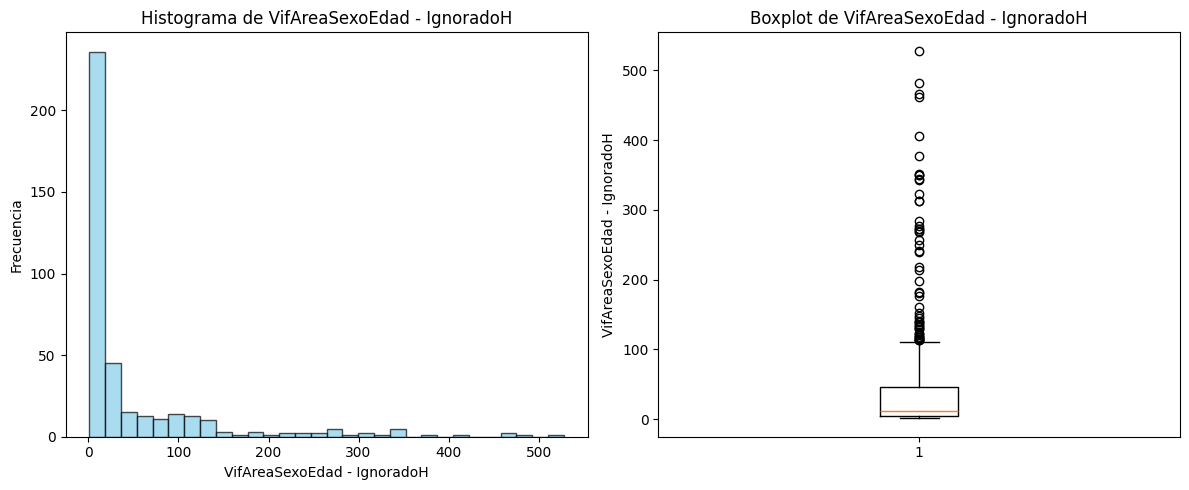

⚠️ La columna 'IgnoradoM' tiene 51 ceros en el archivo 'VifAreaSexoEdad'.
Estadístico de prueba (ks_statistic) = 0.29082343522153486504
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'VifAreaSexoEdad - IgnoradoM' NO provienen de una distribución normal.



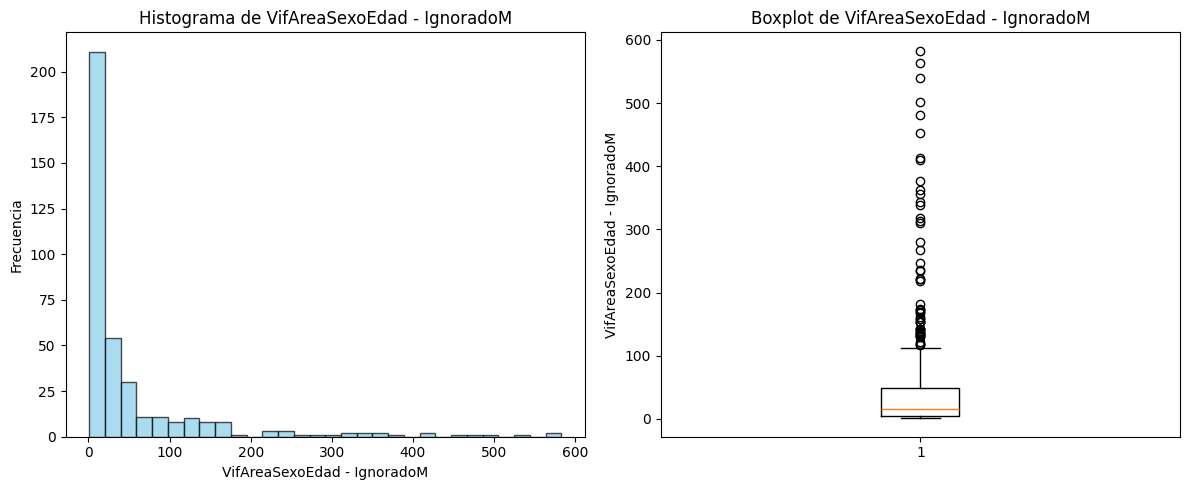

********************************************************************************************

🔹 **Analizando archivo: VifEscolaridad**

⚠️ La columna 'Total' tiene 5 ceros en el archivo 'VifEscolaridad'.
Estadístico de prueba (ks_statistic) = 0.30318588077079811072
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'VifEscolaridad - Total' NO provienen de una distribución normal.



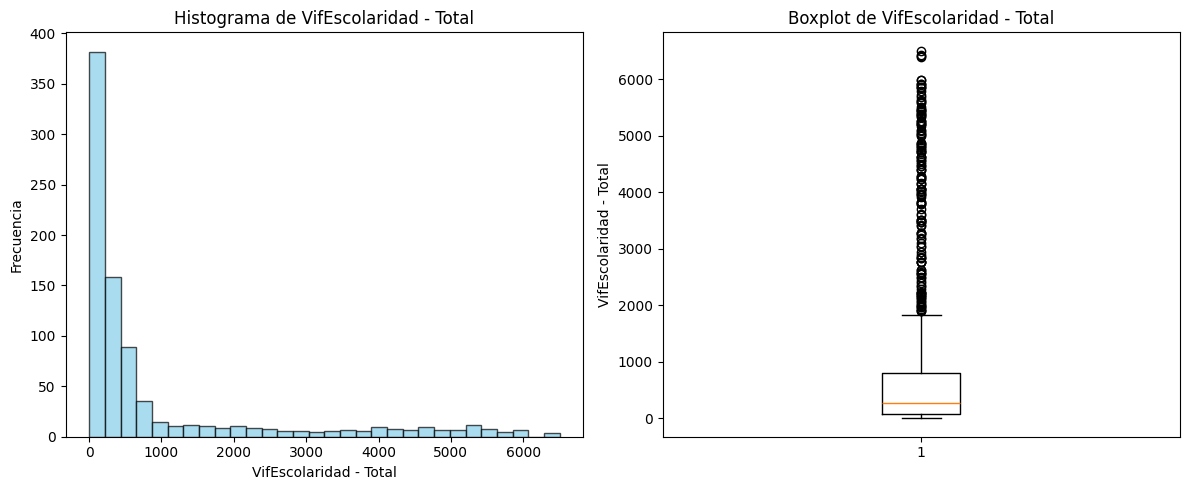

⚠️ La columna 'Ninguno' tiene 36 ceros en el archivo 'VifEscolaridad'.
Estadístico de prueba (ks_statistic) = 0.27522871985761571123
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'VifEscolaridad - Ninguno' NO provienen de una distribución normal.



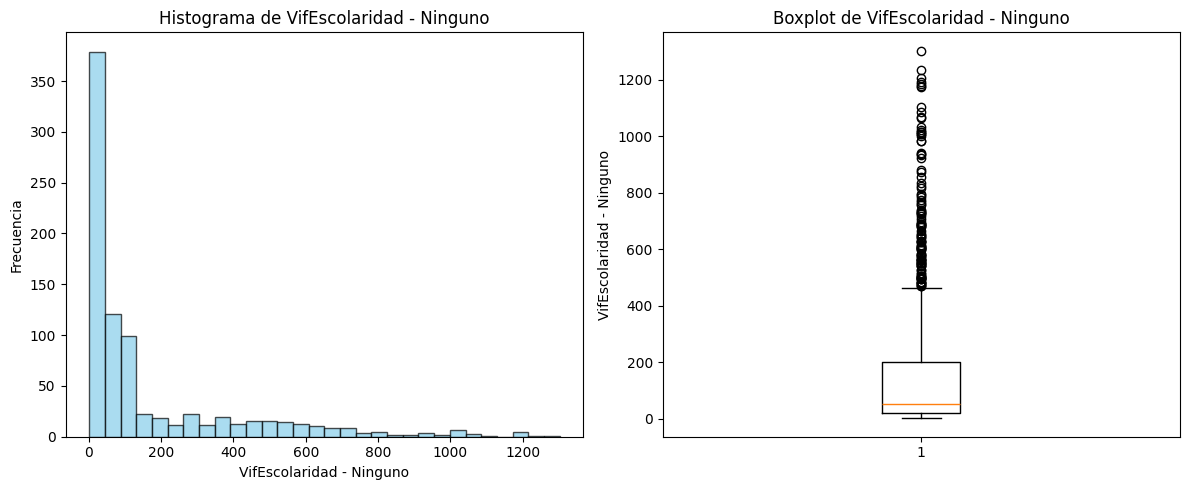

⚠️ La columna 'Primaria' tiene 11 ceros en el archivo 'VifEscolaridad'.
Estadístico de prueba (ks_statistic) = 0.29987947860417785151
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'VifEscolaridad - Primaria' NO provienen de una distribución normal.



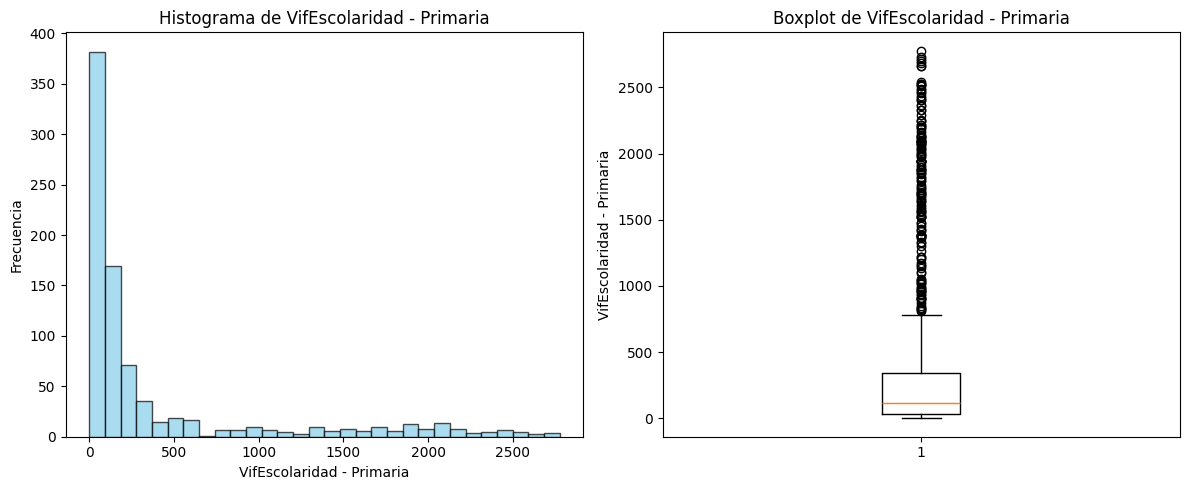

⚠️ La columna 'Básico' tiene 95 ceros en el archivo 'VifEscolaridad'.
Estadístico de prueba (ks_statistic) = 0.30944844562310136471
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'VifEscolaridad - Básico' NO provienen de una distribución normal.



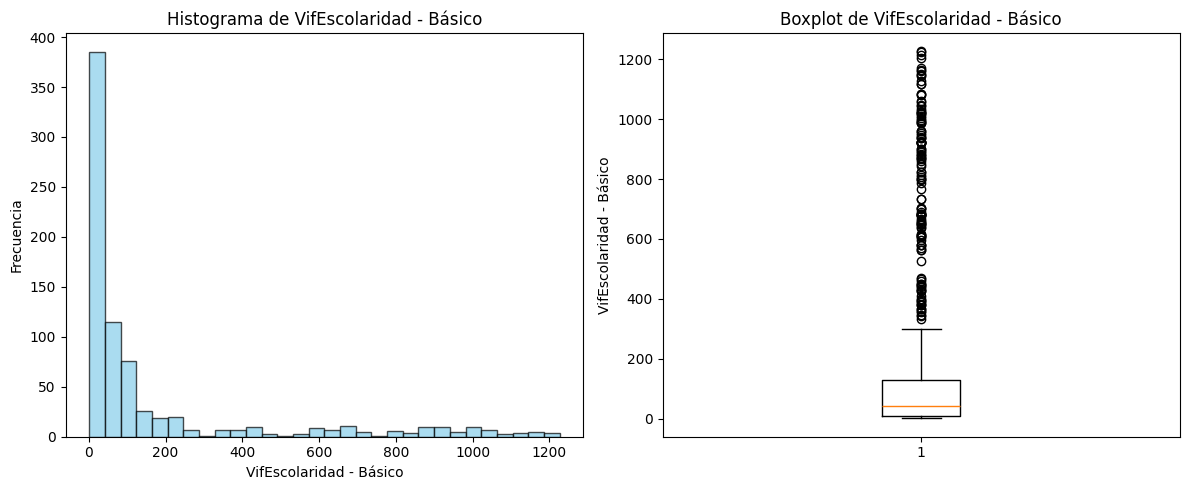

⚠️ La columna 'Diversificado' tiene 148 ceros en el archivo 'VifEscolaridad'.
Estadístico de prueba (ks_statistic) = 0.30062545296779369375
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'VifEscolaridad - Diversificado' NO provienen de una distribución normal.



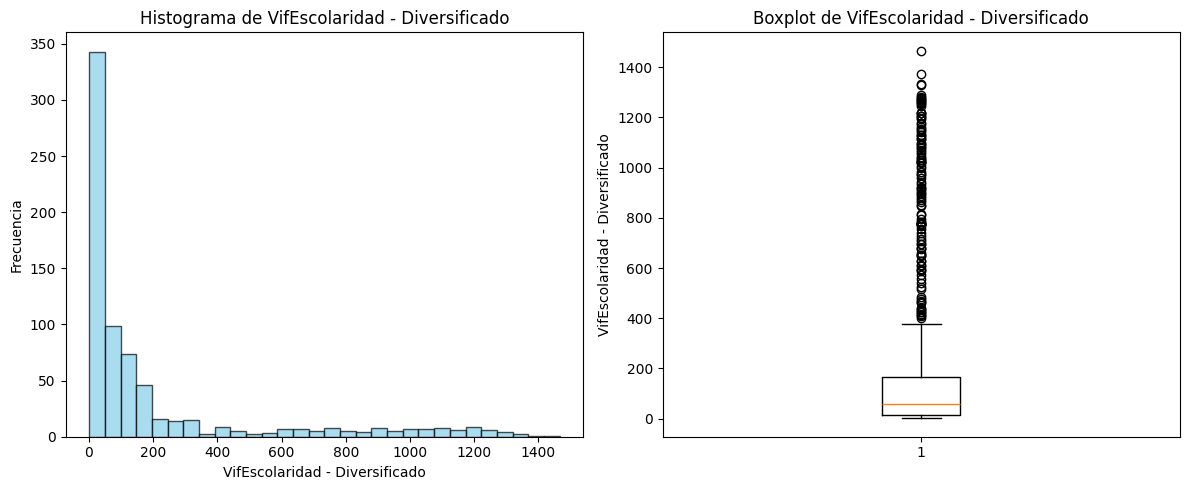

⚠️ La columna 'Universitario' tiene 210 ceros en el archivo 'VifEscolaridad'.
Estadístico de prueba (ks_statistic) = 0.25769583780657856487
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'VifEscolaridad - Universitario' NO provienen de una distribución normal.



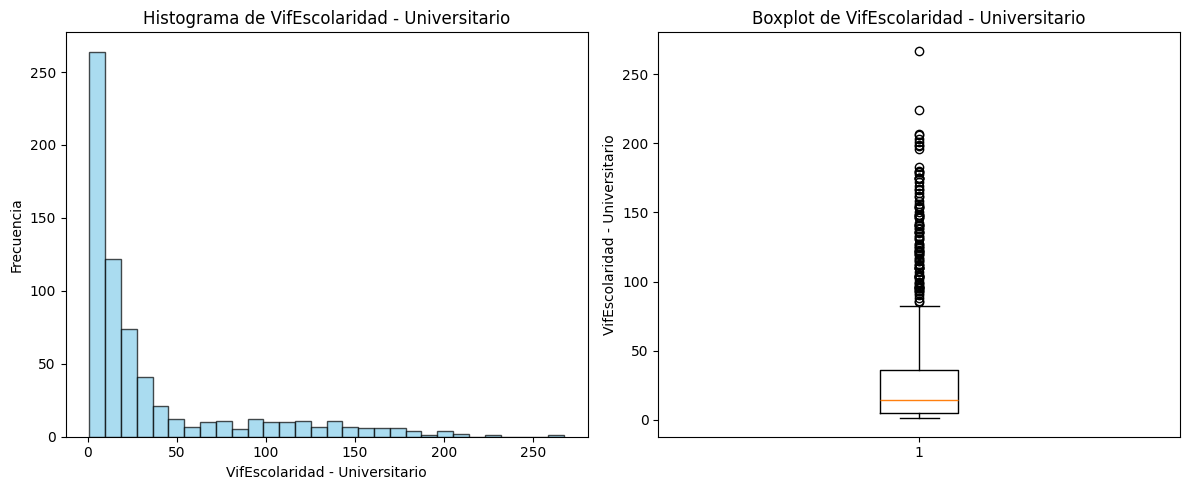

⚠️ La columna 'Ignorado' tiene 106 ceros en el archivo 'VifEscolaridad'.
Estadístico de prueba (ks_statistic) = 0.32512134417317395396
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'VifEscolaridad - Ignorado' NO provienen de una distribución normal.



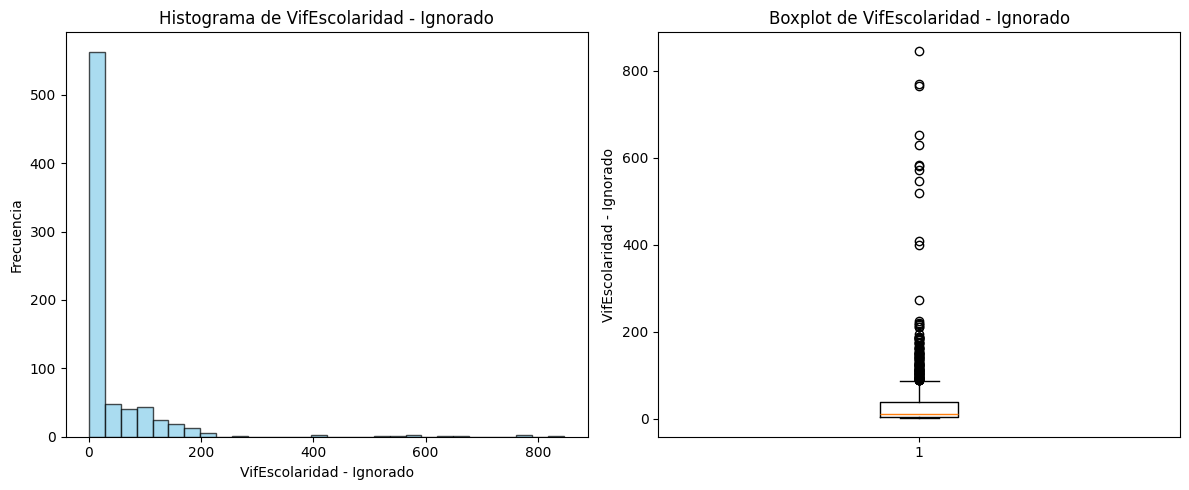

********************************************************************************************

🔹 **Analizando archivo: VifPuebloSexoRelacion**

Estadístico de prueba (ks_statistic) = 0.34157292332588035100
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'VifPuebloSexoRelacion - Total' NO provienen de una distribución normal.



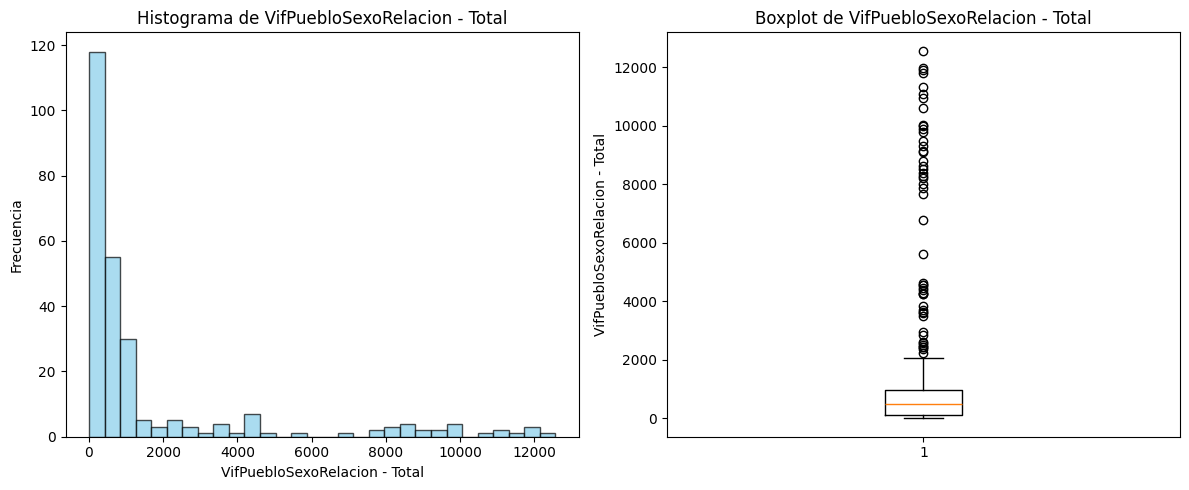

Estadístico de prueba (ks_statistic) = 0.34728655852876011423
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'VifPuebloSexoRelacion - Ladinos(as)' NO provienen de una distribución normal.



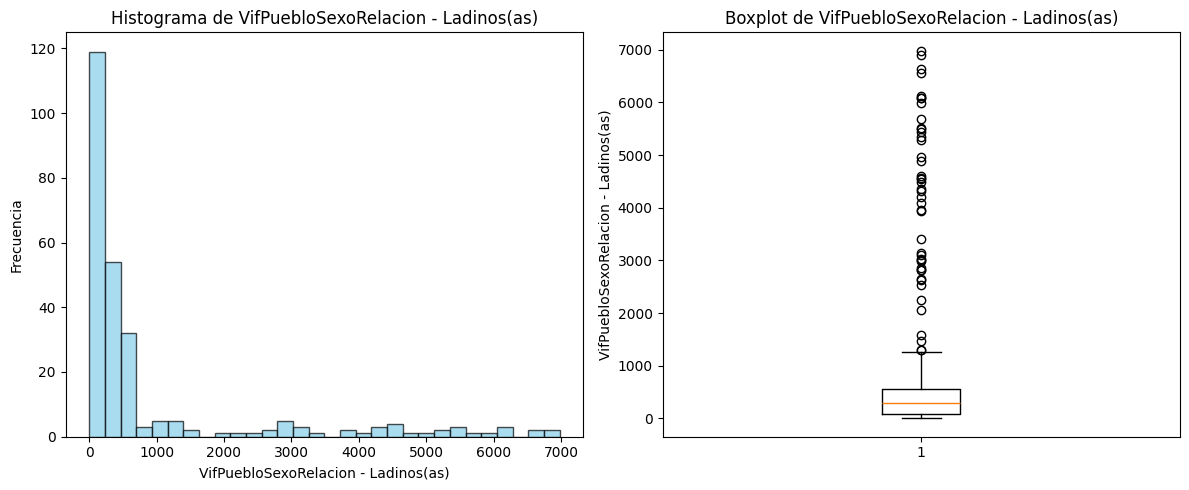

⚠️ La columna 'Mayas' tiene 5 ceros en el archivo 'VifPuebloSexoRelacion'.
Estadístico de prueba (ks_statistic) = 0.31694767916773119998
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'VifPuebloSexoRelacion - Mayas' NO provienen de una distribución normal.



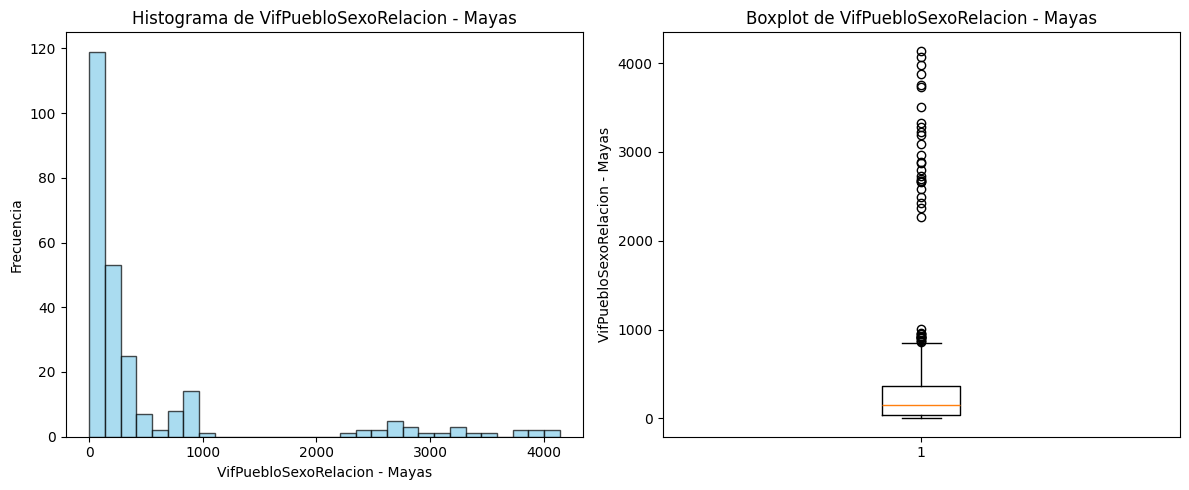

⚠️ La columna 'Garífunas' tiene 138 ceros en el archivo 'VifPuebloSexoRelacion'.
Estadístico de prueba (ks_statistic) = 0.24092571847695964937
p-value = 0.00000102053104664072
Se rechaza la hipótesis nula: los datos de 'VifPuebloSexoRelacion - Garífunas' NO provienen de una distribución normal.



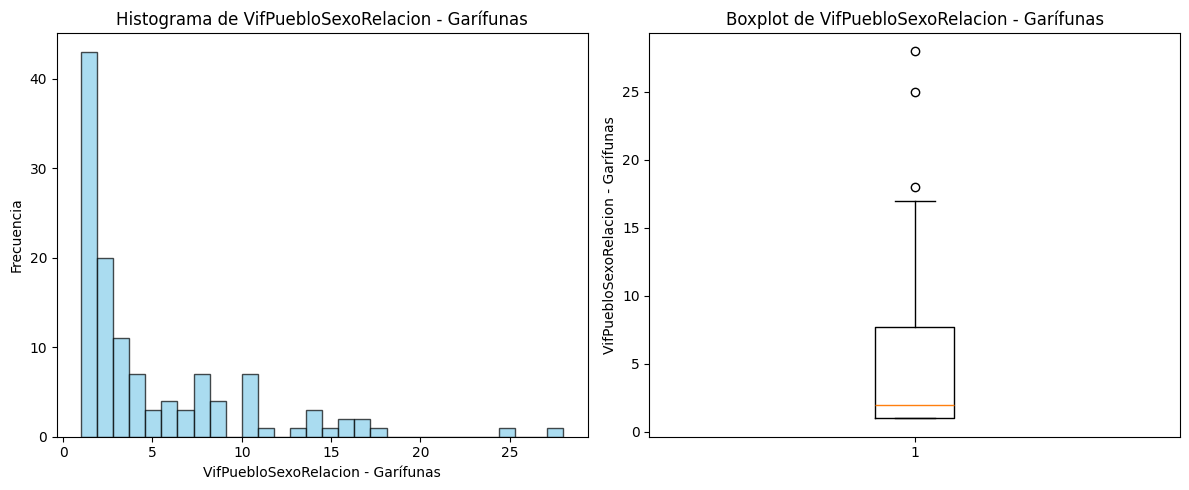

⚠️ La columna 'Xinkas' tiene 138 ceros en el archivo 'VifPuebloSexoRelacion'.
Estadístico de prueba (ks_statistic) = 0.29099678314304600057
p-value = 0.00000000120657717984
Se rechaza la hipótesis nula: los datos de 'VifPuebloSexoRelacion - Xinkas' NO provienen de una distribución normal.



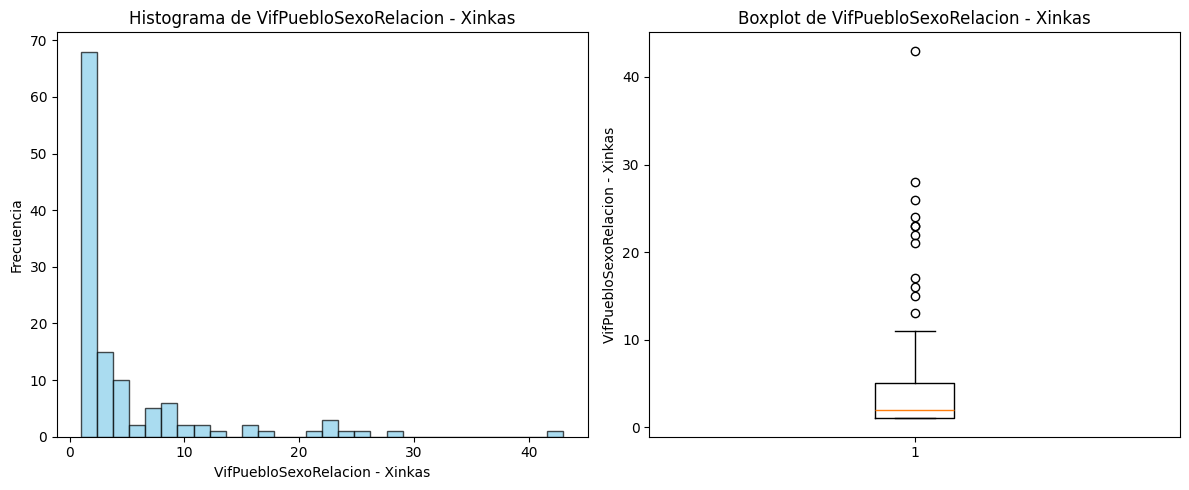

⚠️ La columna 'Otro' tiene 88 ceros en el archivo 'VifPuebloSexoRelacion'.
Estadístico de prueba (ks_statistic) = 0.28673192746887049553
p-value = 0.00000000000051878957
Se rechaza la hipótesis nula: los datos de 'VifPuebloSexoRelacion - Otro' NO provienen de una distribución normal.



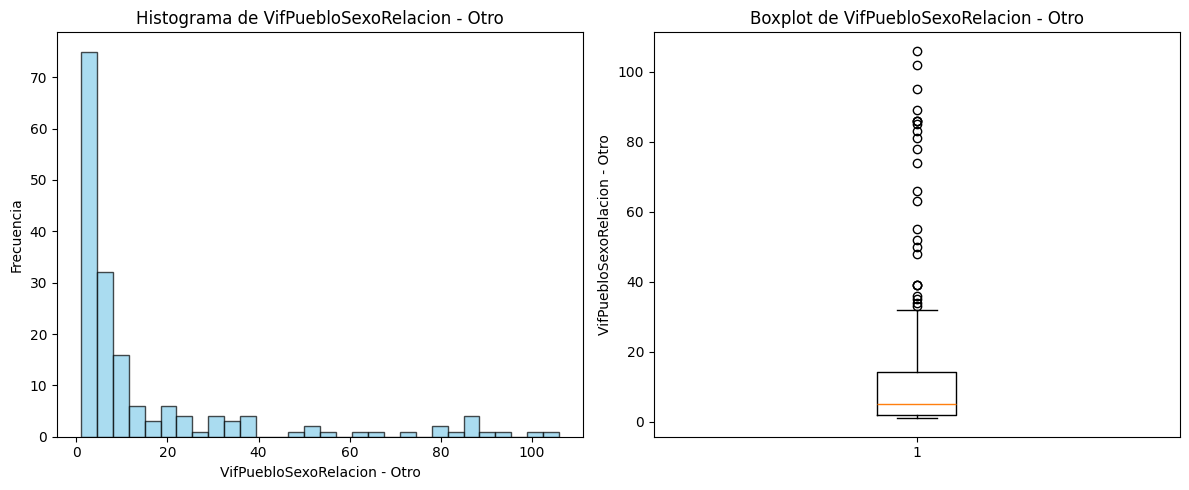

⚠️ La columna 'No indica' tiene 7 ceros en el archivo 'VifPuebloSexoRelacion'.
Estadístico de prueba (ks_statistic) = 0.34086069066334540034
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'VifPuebloSexoRelacion - No indica' NO provienen de una distribución normal.



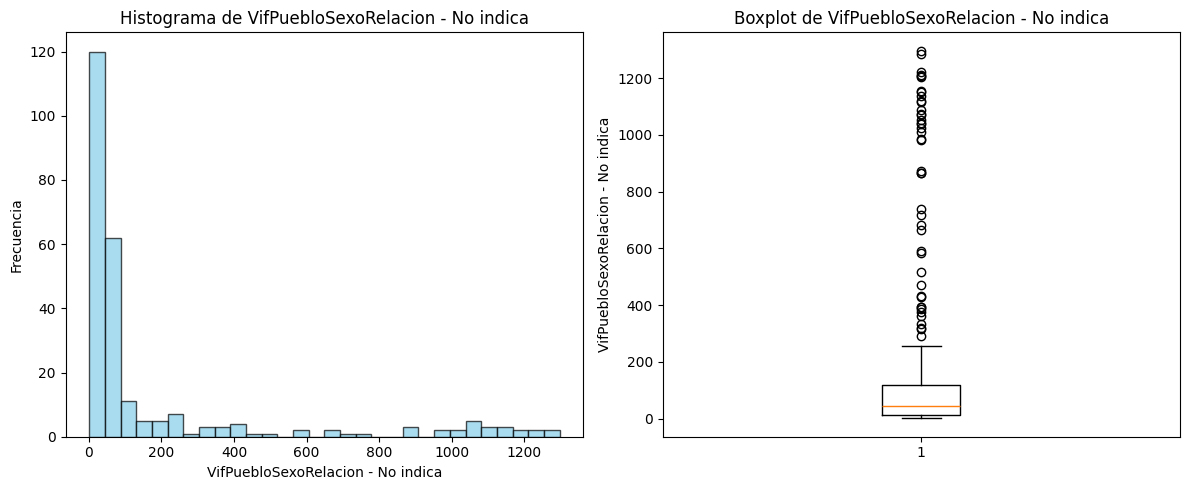

⚠️ La columna 'Ignorado' tiene 32 ceros en el archivo 'VifPuebloSexoRelacion'.
Estadístico de prueba (ks_statistic) = 0.29878973354233095971
p-value = 0.00000000000000000152
Se rechaza la hipótesis nula: los datos de 'VifPuebloSexoRelacion - Ignorado' NO provienen de una distribución normal.



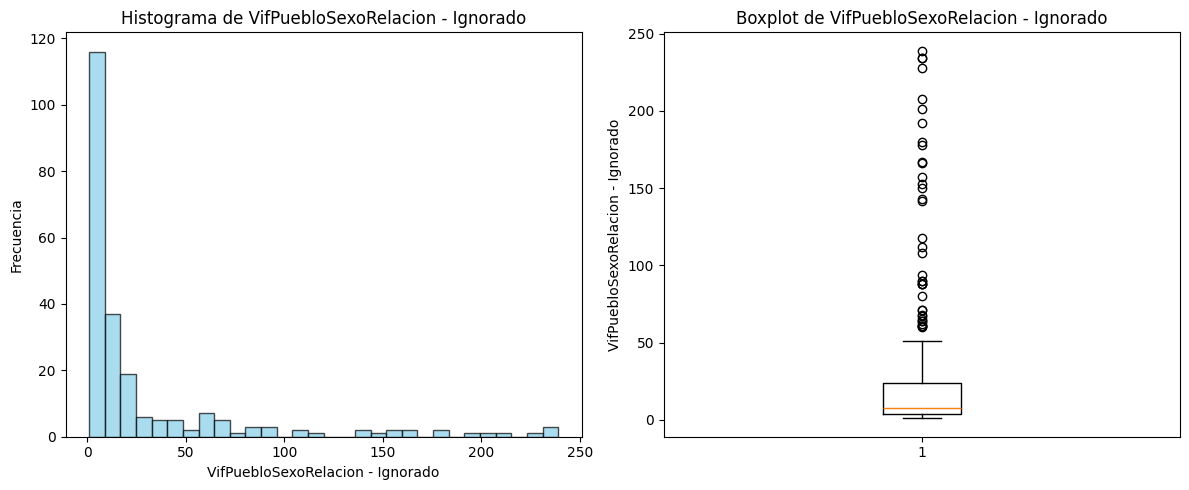

In [141]:
import normalidad

palabras_excluir = ["Total"]

for name, df in dfs.items():
    print("********************************************************************************************")
    print(f"\n🔹 **Analizando archivo: {name}**\n")
    cuantitiativas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    cuantitiativas.remove('Anio')
    
   
     # Filtrar filas que contengan "Todos" o "Todas" en cualquier columna categórica
    df_filtrado = df[~df.select_dtypes(include=[object]).apply(lambda x: x.str.contains('|'.join(palabras_excluir), na=False)).any(axis=1)]
    
    for column in cuantitiativas:  # Solo columnas numéricas
        # Contar los ceros en la columna original
        num_zeros = (df_filtrado[column] == 0).sum()
        
        # Mostrar el número de ceros
        if num_zeros > 0:
            print(f"⚠️ La columna '{column}' tiene {num_zeros} ceros en el archivo '{name}'.")
        
        # Filtrar los ceros de la columna antes de la prueba
        df_filtrado_column = df_filtrado[column].loc[df_filtrado[column] != 0]
        
        # Realizar la prueba solo si hay datos disponibles después de filtrar los ceros
        if not df_filtrado_column.empty:
            normalidad.prueba_de_normalidad(df_filtrado_column, f"{name} - {column}")
        else:
            print(f"⚠️ No hay datos suficientes para realizar la prueba de normalidad en '{name} - {column}' después de eliminar ceros.\n")

       

### Frecuencia


🔹 **Analizando archivo: VifAlfa**



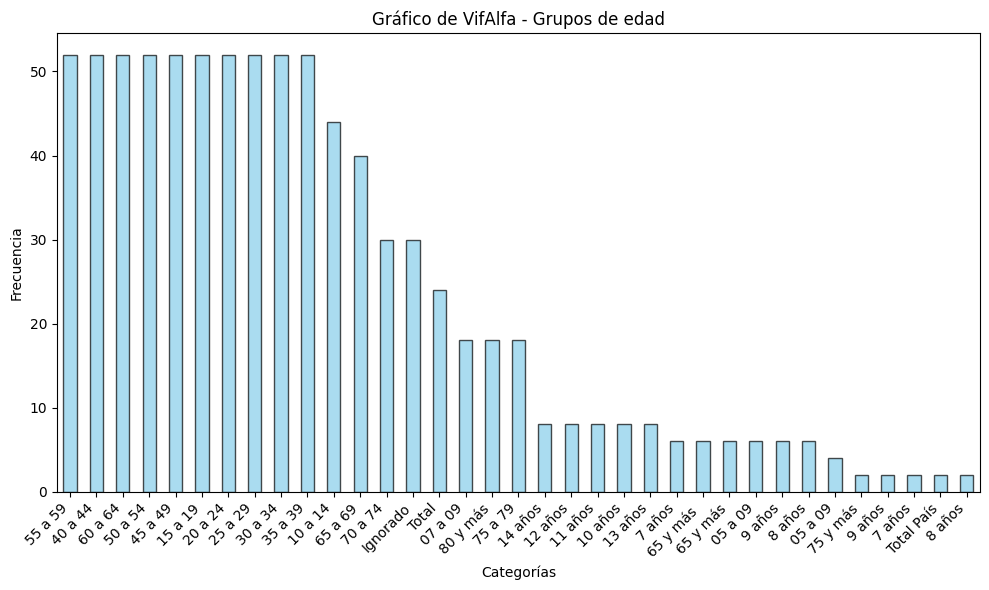

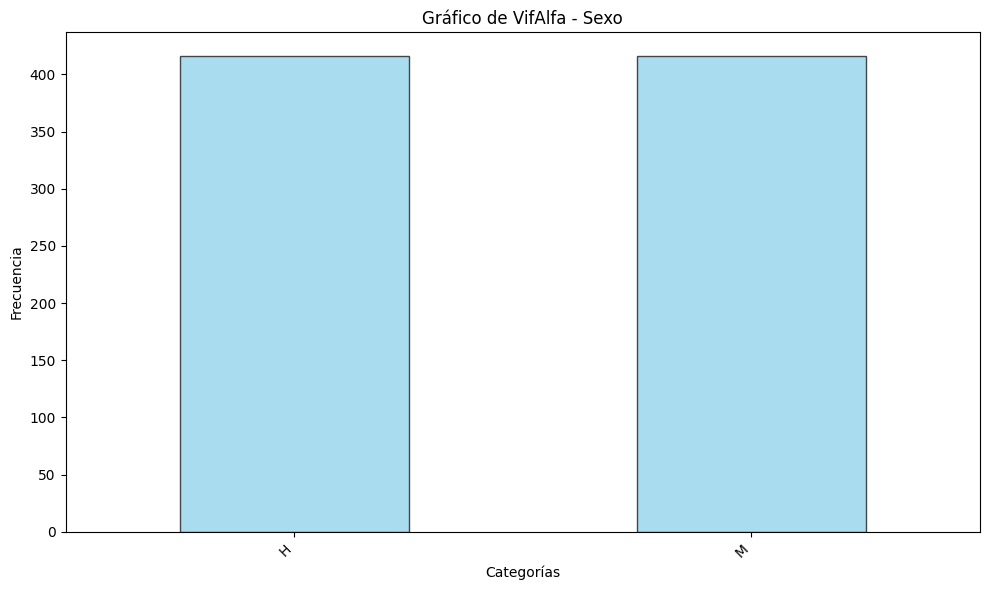

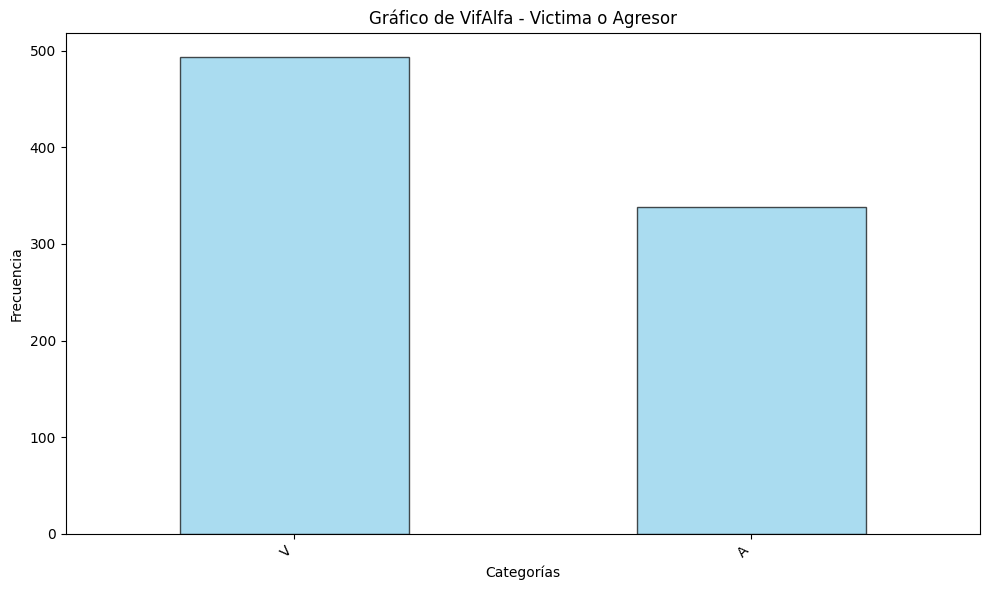

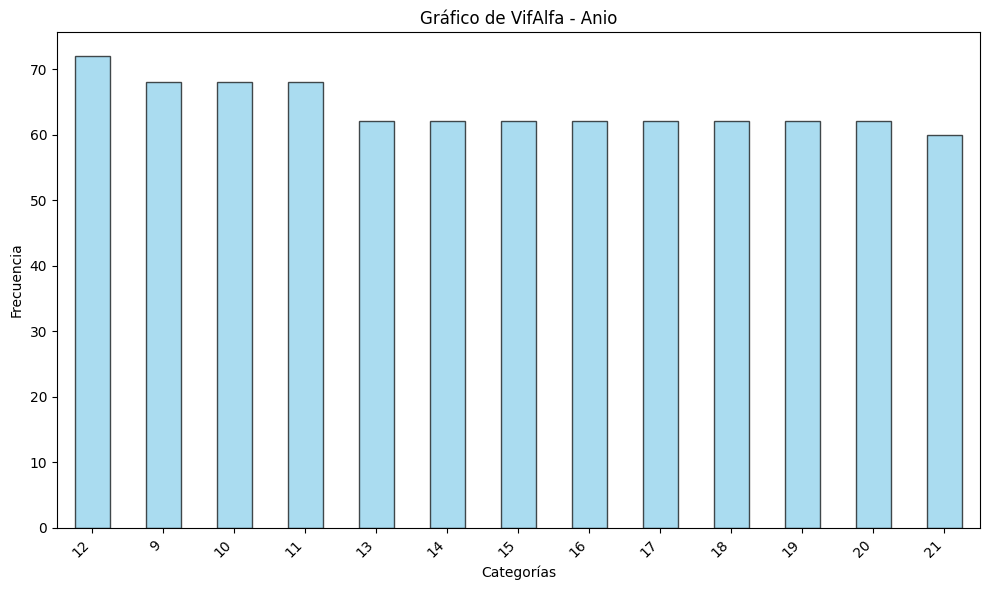


🔹 **Analizando archivo: VifAreaSexoEdad**



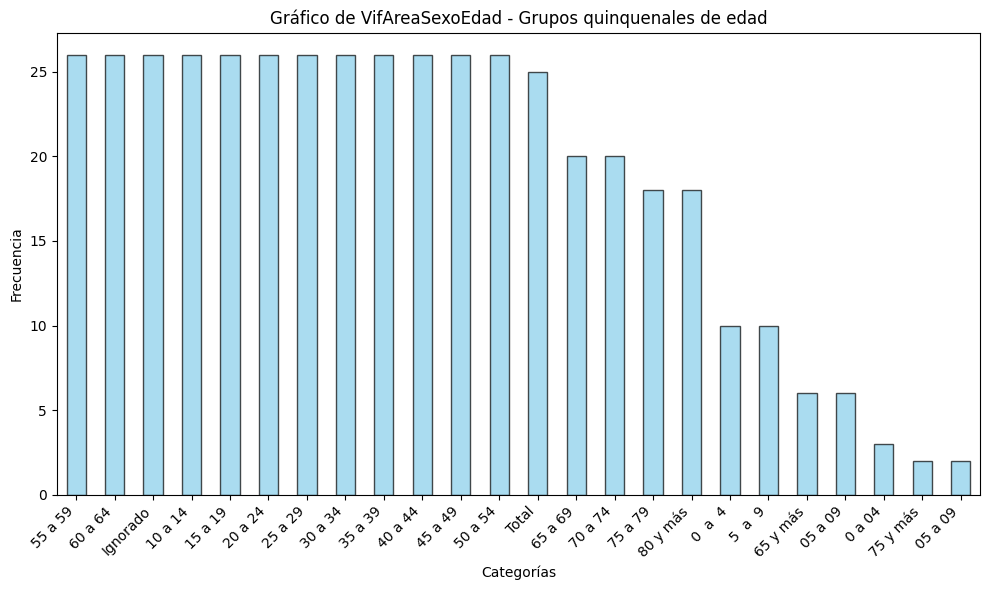

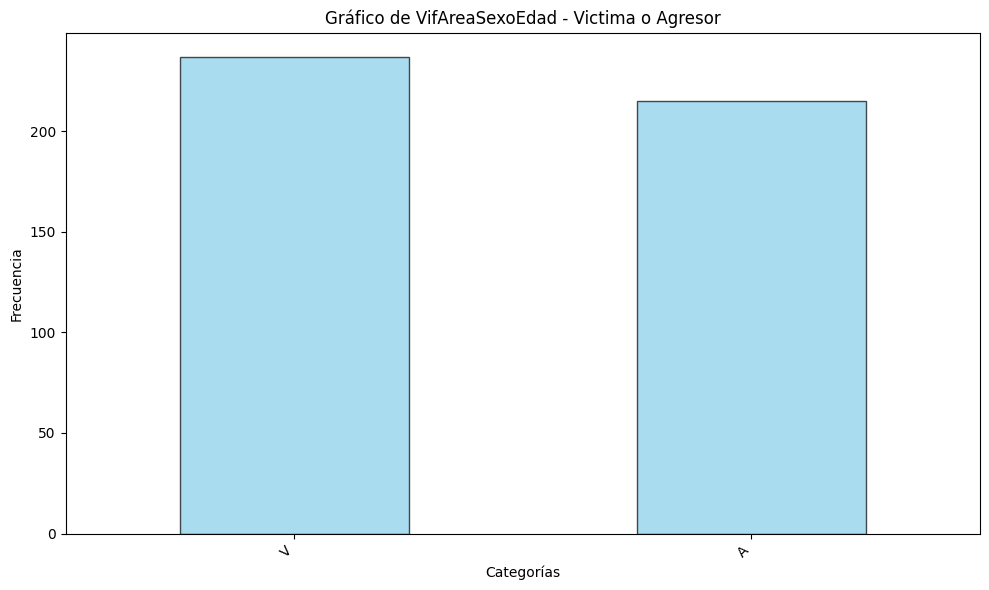

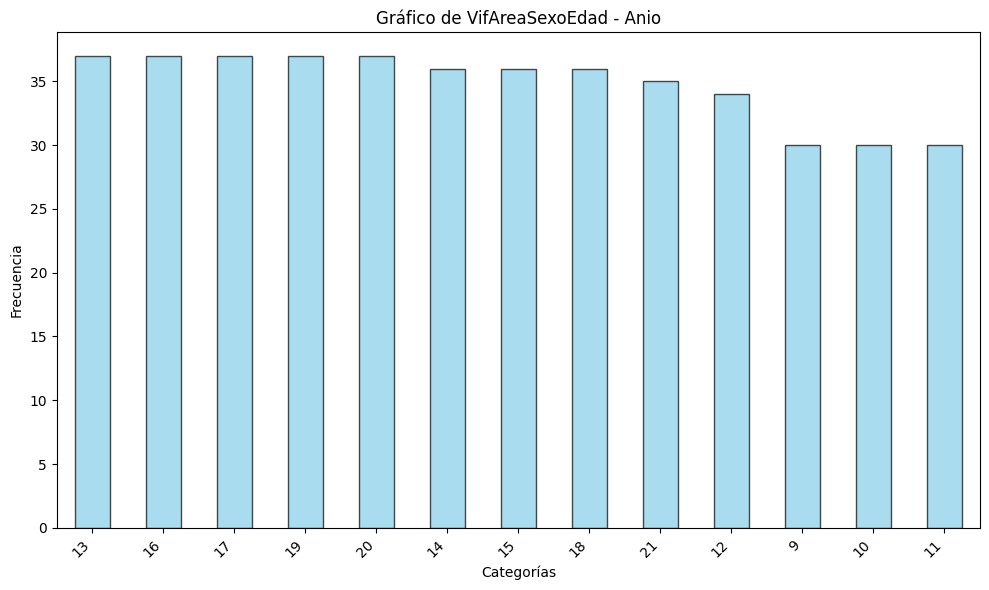


🔹 **Analizando archivo: VifEscolaridad**



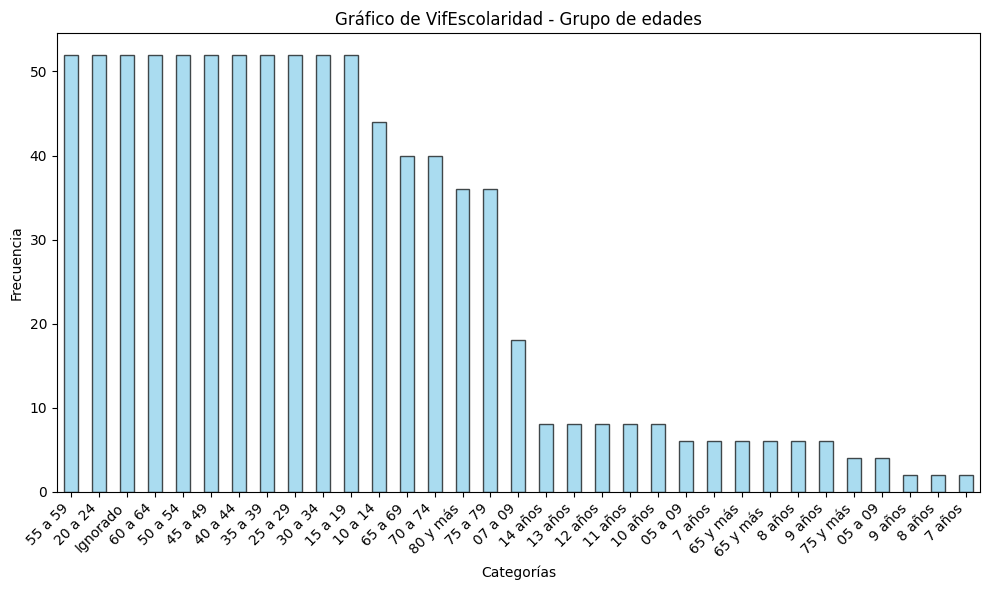

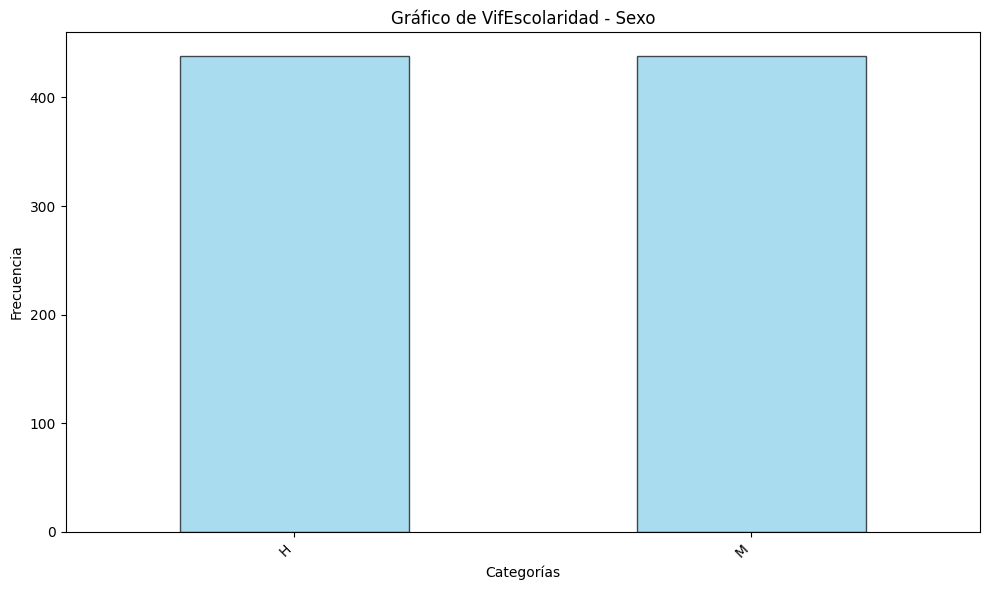

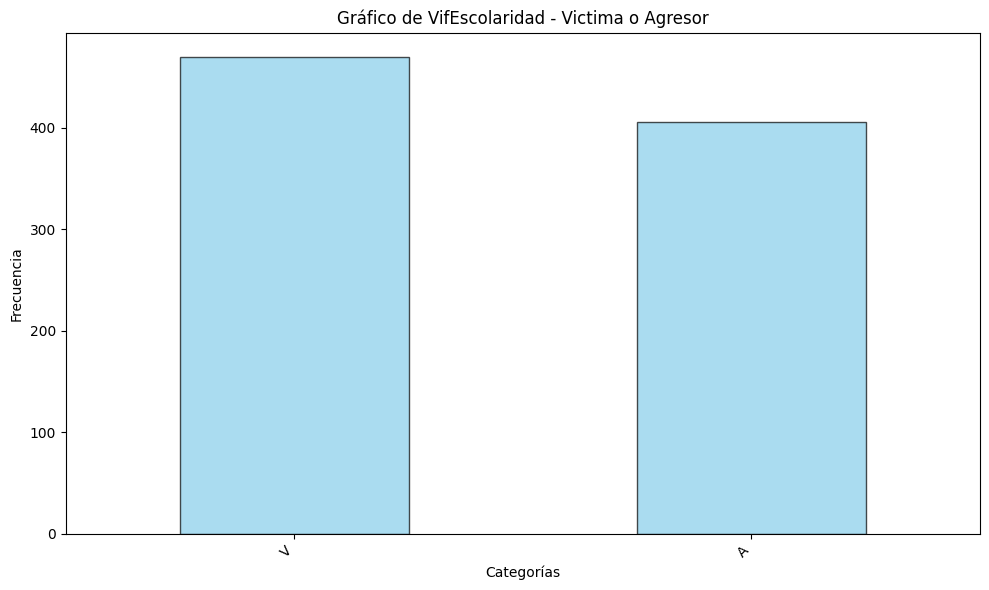

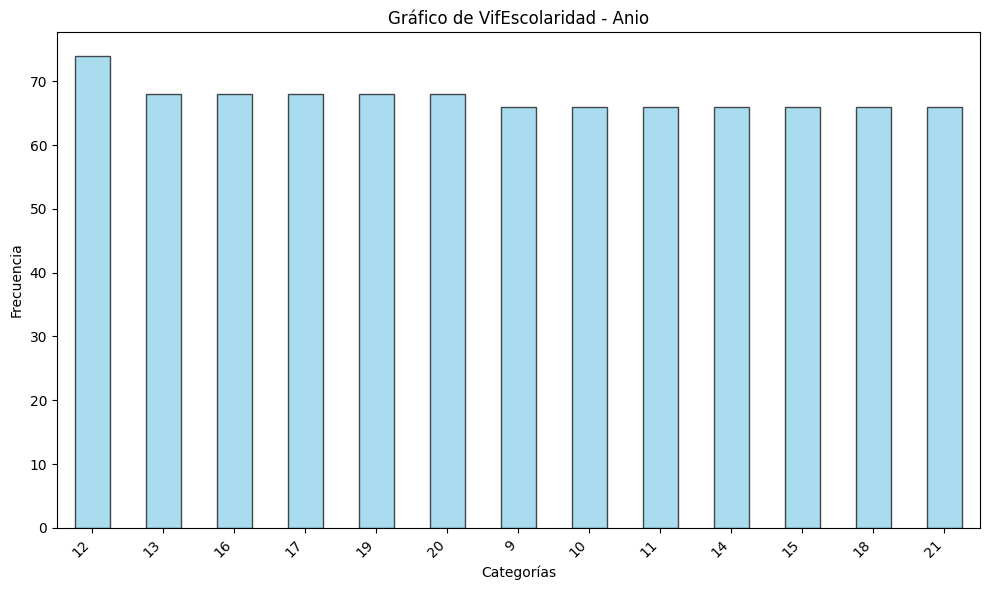


🔹 **Analizando archivo: VifPuebloSexoRelacion**



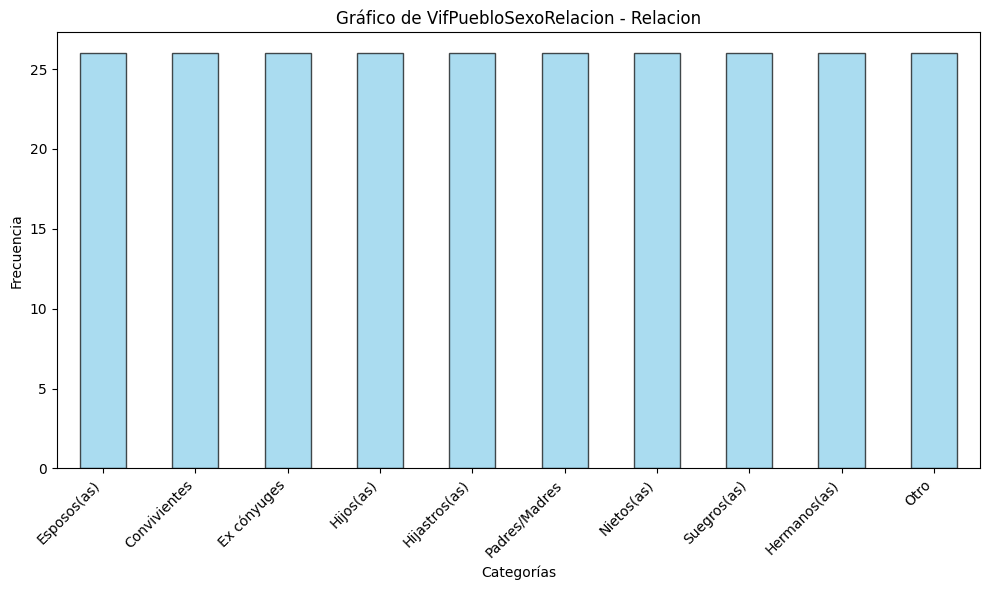

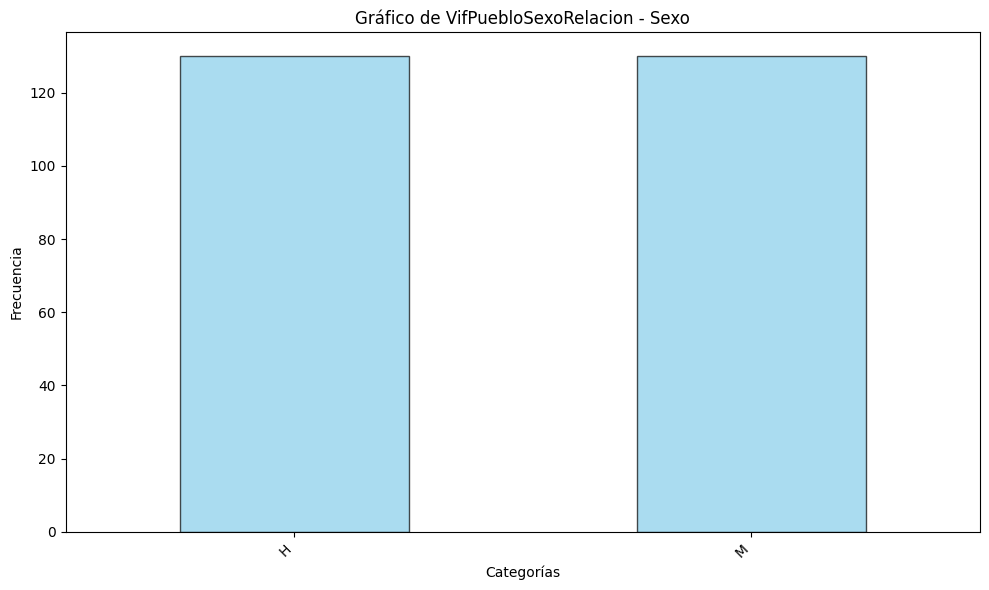

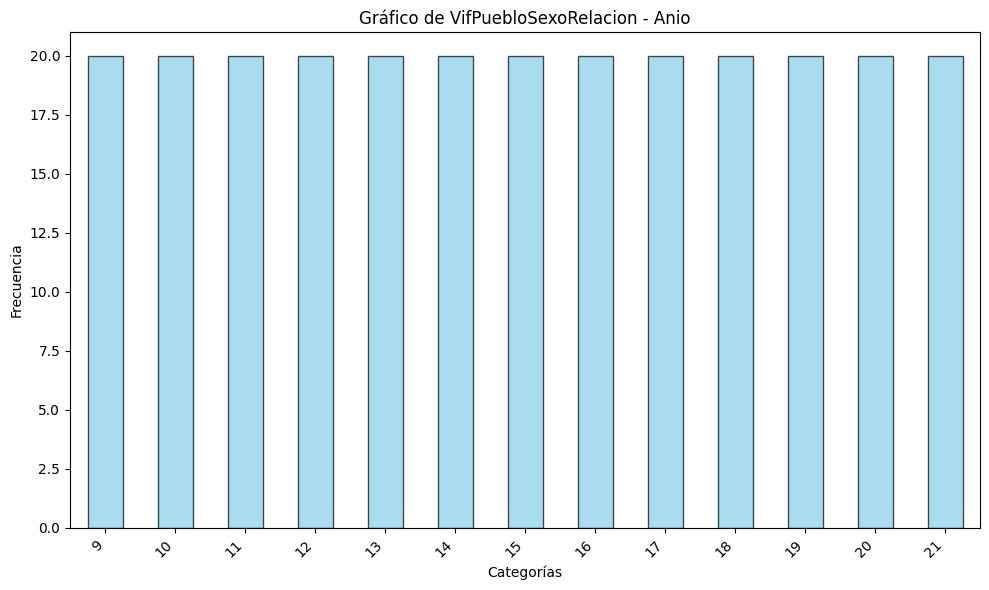

In [142]:
for name, df in dfs.items():
    print(f"\n🔹 **Analizando archivo: {name}**\n")
    cualitativas = df.select_dtypes(include=['object']).columns.tolist()
    cualitativas.append('Anio')
    
    for column in cualitativas:  # Solo columnas numéricas
        normalidad.frecuencias(df[column], f"{name} - {column}")

### Gráficos Exploratorios

#### Clusters 

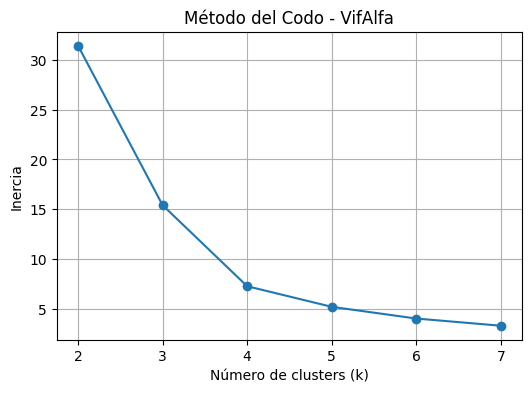

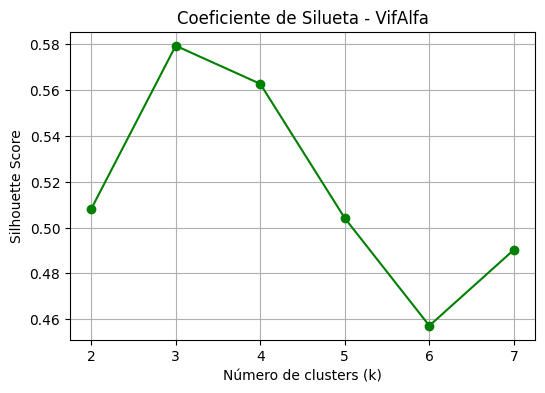

=== Resumen por cluster (valores absolutos) ===


,Total,Alfabeta,Analfabeta,Ignorado
cluster,,,,
0,61925.1,49604.5,11960.8,359.8
1,33442.5,29286.2,3883.1,273.2
2,43985.3,37242.0,5991.0,752.3


=== Proporciones por cluster ===


,Alfabeta,Analfabeta,Ignorado
cluster,,,
0,0.80,0.19,0.01
1,0.88,0.12,0.01
2,0.85,0.14,0.02


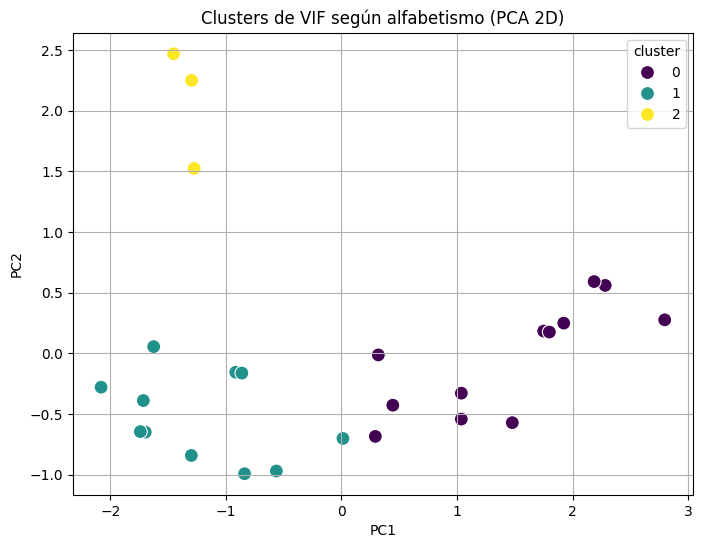

=== Anio y Sexo por cluster ===

Cluster 0:
 - 9 / M
 - 10 / M
 - 11 / M
 - 12 / M
 - 13 / M
 - 14 / M
 - 15 / M
 - 16 / M
 - 17 / M
 - 18 / M
 - 19 / M
 - 20 / M

Cluster 1:
 - 12 / H
 - 13 / H
 - 14 / H
 - 15 / H
 - 16 / H
 - 17 / H
 - 18 / H
 - 19 / H
 - 20 / H
 - 21 / H
 - 21 / M

Cluster 2:
 - 9 / H
 - 10 / H
 - 11 / H


In [143]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Preparar dataframe
df = dfs["VifAlfa"].copy()

# Asegurarse de que las columnas numéricas estén limpias
cols_num = ["Total", "Alfabeta", "Analfabeta", "Ignorado"]
df[cols_num] = df[cols_num].replace("-", 0)
df[cols_num] = df[cols_num].apply(pd.to_numeric, errors='coerce')

# Agrupar por Anio y Sexo
df_agg = df.groupby(["Anio", "Sexo"], as_index=False)[cols_num].sum()

# Calcular proporciones
X = df_agg[["Alfabeta", "Analfabeta", "Ignorado"]].div(df_agg["Total"], axis=0)

# Escalar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Método del codo
inertia = []
for k in range(2, 8):
    km = KMeans(n_clusters=k, random_state=42)
    inertia.append(km.fit(X_scaled).inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(2, 8), inertia, marker="o")
plt.title("Método del Codo - VifAlfa")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inercia")
plt.grid(True)
plt.show()

# Silhouette
scores = []
for k in range(2, 8):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    scores.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(6,4))
plt.plot(range(2, 8), scores, marker="o", color="green")
plt.title("Coeficiente de Silueta - VifAlfa")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Elegir k (puedes ajustar según las gráficas)
k_optimo = 3
kmeans = KMeans(n_clusters=k_optimo, random_state=42)
df_agg["cluster"] = kmeans.fit_predict(X_scaled)

# Resumen por cluster
print("=== Resumen por cluster (valores absolutos) ===")
display(df_agg.groupby("cluster")[["Total", "Alfabeta", "Analfabeta", "Ignorado"]].mean().round(1))

print("=== Proporciones por cluster ===")
props = df_agg.groupby("cluster")[["Alfabeta", "Analfabeta", "Ignorado"]].sum()
props = props.div(props.sum(axis=1), axis=0).round(2)
display(props)

# Visualización PCA
pca = PCA(n_components=2)
coords = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=coords[:,0], y=coords[:,1], hue=df_agg["cluster"], palette="viridis", s=100)
plt.title("Clusters de VIF según alfabetismo (PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

# Mostrar datos por cluster
print("=== Anio y Sexo por cluster ===")
for k in sorted(df_agg["cluster"].unique()):
    print(f"\nCluster {k}:")
    filas = df_agg[df_agg["cluster"] == k][["Anio", "Sexo"]]
    for _, row in filas.iterrows():
        print(f" - {int(row['Anio'])} / {row['Sexo']}")


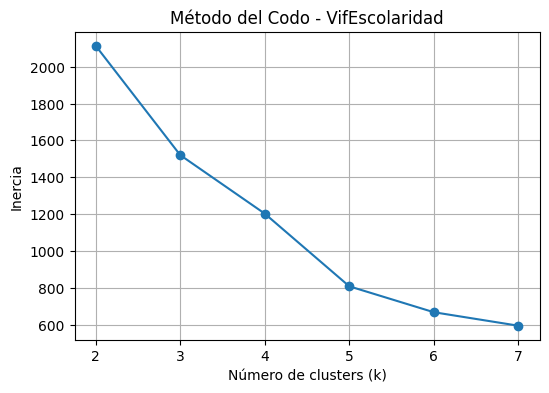

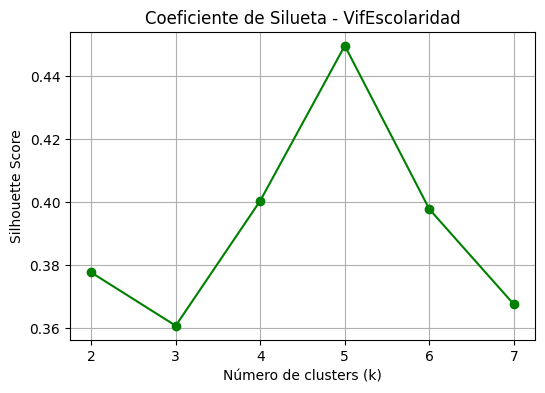

=== Resumen por cluster (valores absolutos) ===


,Total,Ninguno,Primaria,Básico,Diversificado,Universitario,Ignorado
cluster,,,,,,,
0,3106.8,467.0,1331.6,526.4,576.0,87.6,118.3
1,457.8,189.3,174.8,29.1,42.5,11.0,11.2
2,38.6,3.5,26.3,6.9,0.1,0.0,1.8


=== Proporciones de escolaridad por cluster ===


,Ninguno,Primaria,Básico,Diversificado,Universitario,Ignorado
cluster,,,,,,
0,0.15,0.43,0.17,0.19,0.03,0.04
1,0.41,0.38,0.06,0.09,0.02,0.02
2,0.09,0.68,0.18,0.00,0.00,0.05


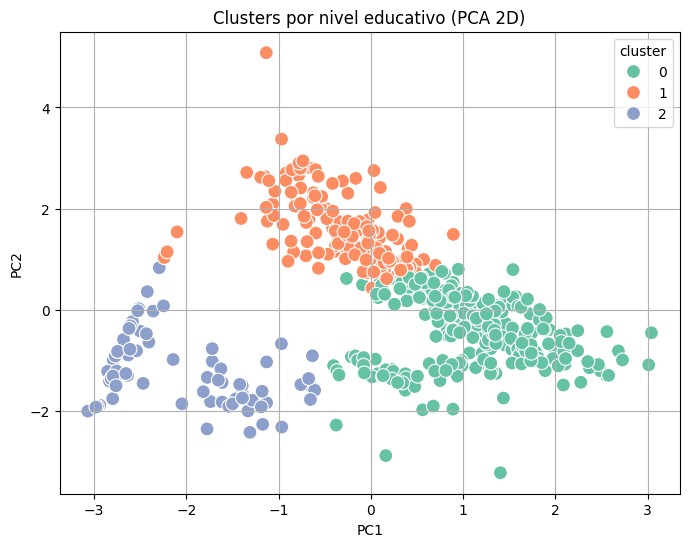

=== Anio, Sexo y Grupo de edades por cluster ===

Cluster 0:
 - 9 / H / 14 años
 - 9 / H / 15 a 19
 - 9 / H / 20 a 24
 - 9 / H / 25 a 29
 - 9 / H / 30 a 34
 - 9 / H / 35 a 39
 - 9 / H / 40 a 44
 - 9 / H / 45 a 49
 - 9 / H / 50 a 54
 - 9 / H / Ignorado
 - 9 / M / 15 a 19
 - 9 / M / 20 a 24
 - 9 / M / 25 a 29
 - 9 / M / 30 a 34
 - 9 / M / 35 a 39
 - 9 / M / 40 a 44
 - 9 / M / Ignorado
 - 10 / H / 15 a 19
 - 10 / H / 20 a 24
 - 10 / H / 25 a 29
 - 10 / H / 30 a 34
 - 10 / H / 35 a 39
 - 10 / H / 40 a 44
 - 10 / H / 45 a 49
 - 10 / H / 50 a 54
 - 10 / H / 55 a 59
 - 10 / H / Ignorado
 - 10 / M / 10 a 14
 - 10 / M / 15 a 19
 - 10 / M / 20 a 24
 - 10 / M / 25 a 29
 - 10 / M / 30 a 34
 - 10 / M / 35 a 39
 - 10 / M / 40 a 44
 - 10 / M / Ignorado
 - 11 / H / 14 años
 - 11 / H / 15 a 19
 - 11 / H / 20 a 24
 - 11 / H / 25 a 29
 - 11 / H / 30 a 34
 - 11 / H / 35 a 39
 - 11 / H / 40 a 44
 - 11 / H / 45 a 49
 - 11 / H / 50 a 54
 - 11 / H / 55 a 59
 - 11 / H / Ignorado
 - 11 / M / 15 a 19
 - 11 / M /

In [144]:
# Cargar y preparar
df = dfs["VifEscolaridad"].copy()

# Variables numéricas
cols_num = ["Total", "Ninguno", "Primaria", "Básico", "Diversificado", "Universitario", "Ignorado"]
df[cols_num] = df[cols_num].replace("-", 0)
df[cols_num] = df[cols_num].apply(pd.to_numeric, errors="coerce")

# Agrupar por Anio, Sexo y Grupo de edades
df_agg = df.groupby(["Anio", "Sexo", "Grupo de edades"], as_index=False)[cols_num].sum()

# Eliminar filas con Total = 0 o NaN
df_agg = df_agg[df_agg["Total"] > 0].dropna(subset=["Total"])

# Calcular proporciones
X = df_agg[["Ninguno", "Primaria", "Básico", "Diversificado", "Universitario", "Ignorado"]].div(df_agg["Total"], axis=0)

# Eliminar filas con NaNs resultantes
X = X.dropna()
df_agg = df_agg.loc[X.index]  # mantener sincronizados


# Escalar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Asegurar alineación de índices
X = X.reset_index(drop=True)
df_agg = df_agg.reset_index(drop=True)


# Método del codo
inertia = []
for k in range(2, 8):
    km = KMeans(n_clusters=k, random_state=42)
    inertia.append(km.fit(X_scaled).inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(2, 8), inertia, marker="o")
plt.title("Método del Codo - VifEscolaridad")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inercia")
plt.grid(True)
plt.show()

# Silhouette
scores = []
for k in range(2, 8):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    scores.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(6,4))
plt.plot(range(2, 8), scores, marker="o", color="green")
plt.title("Coeficiente de Silueta - VifEscolaridad")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Elegir k (ajustable)
k_optimo = 3
kmeans = KMeans(n_clusters=k_optimo, random_state=42)
df_agg["cluster"] = kmeans.fit_predict(X_scaled)

# Resumen absoluto por cluster
print("=== Resumen por cluster (valores absolutos) ===")
display(df_agg.groupby("cluster")[cols_num].mean().round(1))

# Proporciones por cluster
props = df_agg.groupby("cluster")[["Ninguno", "Primaria", "Básico", "Diversificado", "Universitario", "Ignorado"]].sum()
props = props.div(props.sum(axis=1), axis=0).round(2)
print("=== Proporciones de escolaridad por cluster ===")
display(props)

# Visualización PCA
pca = PCA(n_components=2)
coords = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=coords[:,0], y=coords[:,1], hue=df_agg["cluster"], palette="Set2", s=100)
plt.title("Clusters por nivel educativo (PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

# Mostrar agrupaciones por cluster
print("=== Anio, Sexo y Grupo de edades por cluster ===")
for k in sorted(df_agg["cluster"].unique()):
    print(f"\nCluster {k}:")
    sub = df_agg[df_agg["cluster"] == k][["Anio", "Sexo", "Grupo de edades"]]
    for _, row in sub.iterrows():
        print(f" - {int(row['Anio'])} / {row['Sexo']} / {row['Grupo de edades']}")


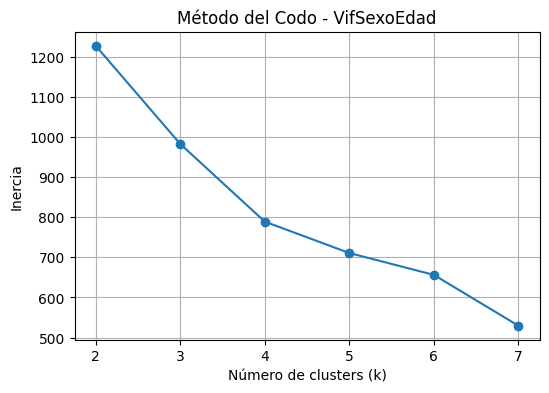

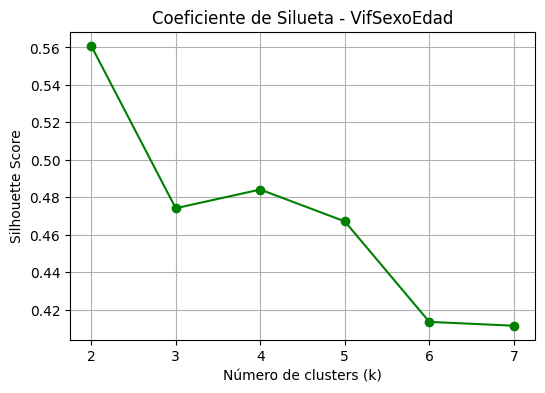

=== Resumen por cluster (valores absolutos) ===


,Total,Urban,UrbanH,UrbanM,Rural,RuralH,RuralM
cluster,,,,,,,
0,3916.9,2126.6,1840.2,286.4,1608.1,1411.5,196.6
1,5193.4,2845.5,295.7,2549.8,2103.6,209.8,1893.8
2,902.0,444.7,65.7,378.9,426.1,63.4,362.8


=== Proporciones urbano/rural por cluster ===


,Urban,UrbanH,UrbanM,Rural,RuralH,RuralM
cluster,,,,,,
0,0.28,0.25,0.04,0.22,0.19,0.03
1,0.29,0.03,0.26,0.21,0.02,0.19
2,0.26,0.04,0.22,0.24,0.04,0.21


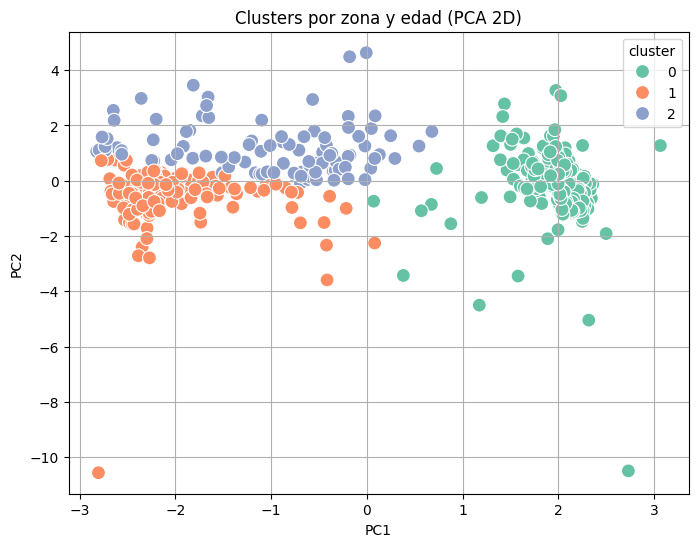

=== Anio, Rol y Grupo de edad por cluster ===

Cluster 0:
 - 9 / A / 15 a 19
 - 9 / A / 20 a 24
 - 9 / A / 25 a 29
 - 9 / A / 30 a 34
 - 9 / A / 35 a 39
 - 9 / A / 40 a 44
 - 9 / A / 45 a 49
 - 9 / A / 50 a 54
 - 9 / A / 55 a 59
 - 9 / A / 60 a 64
 - 9 / A / 65 y más
 - 9 / A / Ignorado
 - 9 / A / Total
 - 10 / A / 15 a 19
 - 10 / A / 20 a 24
 - 10 / A / 25 a 29
 - 10 / A / 30 a 34
 - 10 / A / 35 a 39
 - 10 / A / 40 a 44
 - 10 / A / 45 a 49
 - 10 / A / 50 a 54
 - 10 / A / 55 a 59
 - 10 / A / 60 a 64
 - 10 / A / 65 y más
 - 10 / A / Ignorado
 - 10 / A / Total
 - 11 / A / 15 a 19
 - 11 / A / 20 a 24
 - 11 / A / 25 a 29
 - 11 / A / 30 a 34
 - 11 / A / 35 a 39
 - 11 / A / 40 a 44
 - 11 / A / 45 a 49
 - 11 / A / 50 a 54
 - 11 / A / 55 a 59
 - 11 / A / 60 a 64
 - 11 / A / 65 y más
 - 11 / A / Ignorado
 - 11 / A / Total
 - 12 / A / 15 a 19
 - 12 / A / 20 a 24
 - 12 / A / 25 a 29
 - 12 / A / 30 a 34
 - 12 / A / 35 a 39
 - 12 / A / 40 a 44
 - 12 / A / 45 a 49
 - 12 / A / 50 a 54
 - 12 / A / 55 

In [145]:
# Cargar y preparar
df = dfs["VifAreaSexoEdad"].copy()

# Variables numéricas
cols_num = ["Total", "Urban", "UrbanH", "UrbanM", "Rural", "RuralH", "RuralM"]
df[cols_num] = df[cols_num].replace("-", 0)
df[cols_num] = df[cols_num].apply(pd.to_numeric, errors="coerce")

# Agrupar por Anio, Victima o Agresor y grupo de edad
df_agg = df.groupby(["Anio", "Victima o Agresor", "Grupos quinquenales de edad"], as_index=False)[cols_num].sum()

# Eliminar filas con Total = 0 o NaN
df_agg = df_agg[df_agg["Total"] > 0].dropna(subset=["Total"])

# Calcular proporciones
X = df_agg[["Urban", "UrbanH", "UrbanM", "Rural", "RuralH", "RuralM"]].div(df_agg["Total"], axis=0)

# Asegurar sincronización de índices
X = X.dropna()
df_agg = df_agg.loc[X.index]
X = X.reset_index(drop=True)
df_agg = df_agg.reset_index(drop=True)

# Método del codo
inertia = []
X_scaled = StandardScaler().fit_transform(X)
for k in range(2, 8):
    km = KMeans(n_clusters=k, random_state=42)
    inertia.append(km.fit(X_scaled).inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(2, 8), inertia, marker="o")
plt.title("Método del Codo - VifSexoEdad")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inercia")
plt.grid(True)
plt.show()

# Silhouette Score
scores = []
for k in range(2, 8):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    scores.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(6,4))
plt.plot(range(2, 8), scores, marker="o", color="green")
plt.title("Coeficiente de Silueta - VifSexoEdad")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Elegir mejor k
k_optimo = 3
kmeans = KMeans(n_clusters=k_optimo, random_state=42)
df_agg["cluster"] = kmeans.fit_predict(X_scaled)

# Resumen absoluto por cluster
print("=== Resumen por cluster (valores absolutos) ===")
display(df_agg.groupby("cluster")[cols_num].mean().round(1))

# Proporciones por cluster
props = df_agg.groupby("cluster")[["Urban", "UrbanH", "UrbanM", "Rural", "RuralH", "RuralM"]].sum()
props = props.div(props.sum(axis=1), axis=0).round(2)
print("=== Proporciones urbano/rural por cluster ===")
display(props)

# Visualización PCA
pca = PCA(n_components=2)
coords = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=coords[:,0], y=coords[:,1], hue=df_agg["cluster"], palette="Set2", s=100)
plt.title("Clusters por zona y edad (PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

# Mostrar agrupaciones por cluster
print("=== Anio, Rol y Grupo de edad por cluster ===")
for k in sorted(df_agg["cluster"].unique()):
    print(f"\nCluster {k}:")
    sub = df_agg[df_agg["cluster"] == k][["Anio", "Victima o Agresor", "Grupos quinquenales de edad"]]
    for _, row in sub.iterrows():
        print(f" - {int(row['Anio'])} / {row['Victima o Agresor']} / {row['Grupos quinquenales de edad']}")


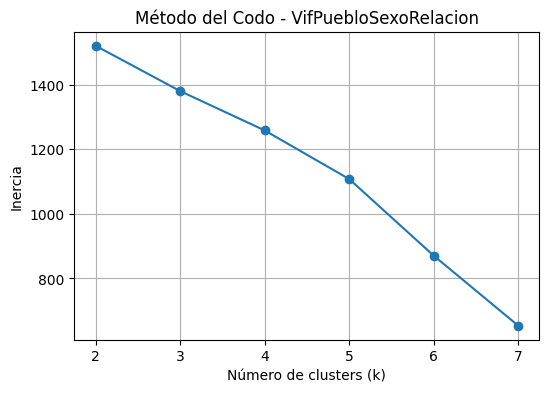

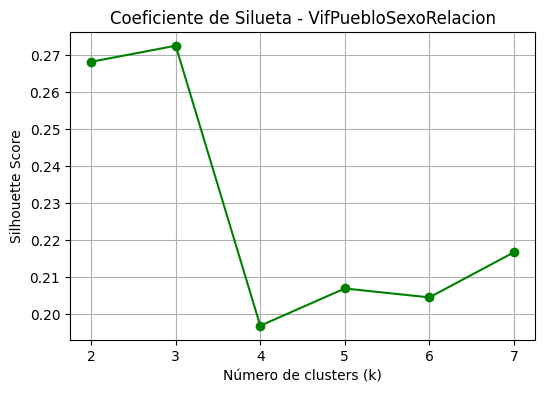

=== Resumen por cluster (valores absolutos) ===


,Ladinos(as),Mayas,Garífunas,Xinkas,Otro,No indica,Ignorado,Total
cluster,,,,,,,,
0,1089.9,657.2,2.5,3.0,12.0,221.0,31.7,2017.4
1,600.8,184.1,1.8,1.0,6.5,86.3,14.0,894.5
2,2.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0


=== Proporciones por grupo étnico por cluster ===


,Ladinos(as),Mayas,Garífunas,Xinkas,Otro,No indica,Ignorado
cluster,,,,,,,
0,0.54,0.33,0.0,0.0,0.01,0.11,0.02
1,0.67,0.21,0.0,0.0,0.01,0.10,0.02
2,0.50,0.00,0.0,0.0,0.00,0.25,0.25


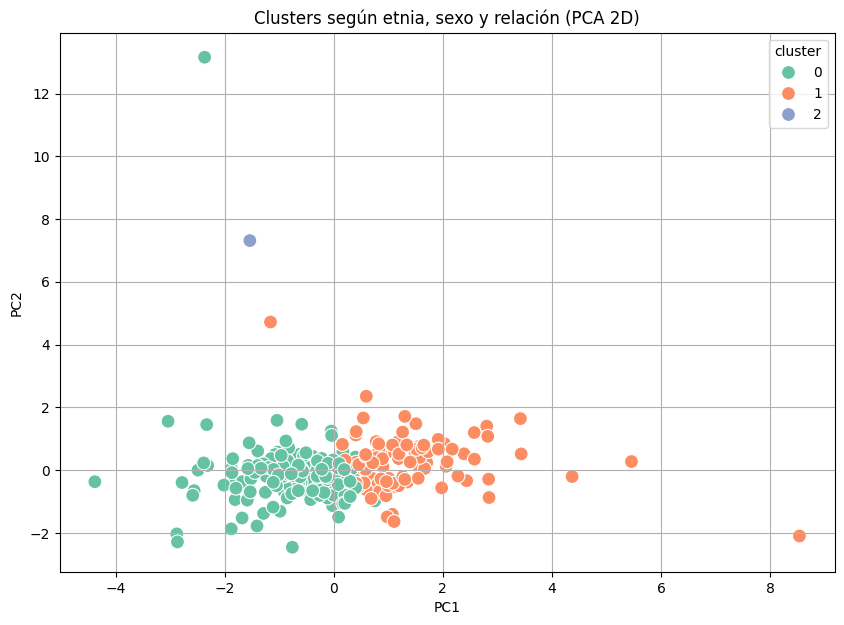

=== Año, Sexo y Relación por cluster ===

Cluster 0:
 - 9 / H / Hermanos(as)
 - 9 / H / Otro
 - 9 / H / Padres/Madres
 - 9 / H / Suegros(as)
 - 9 / M / Convivientes
 - 9 / M / Esposos(as)
 - 9 / M / Hermanos(as)
 - 9 / M / Hijastros(as)
 - 9 / M / Padres/Madres
 - 10 / H / Hermanos(as)
 - 10 / H / Hijos(as)
 - 10 / H / Otro
 - 10 / H / Padres/Madres
 - 10 / H / Suegros(as)
 - 10 / M / Convivientes
 - 10 / M / Esposos(as)
 - 10 / M / Hermanos(as)
 - 10 / M / Hijos(as)
 - 10 / M / Otro
 - 10 / M / Padres/Madres
 - 11 / H / Convivientes
 - 11 / H / Hermanos(as)
 - 11 / H / Otro
 - 11 / H / Padres/Madres
 - 11 / H / Suegros(as)
 - 11 / M / Convivientes
 - 11 / M / Esposos(as)
 - 11 / M / Hermanos(as)
 - 11 / M / Nietos(as)
 - 11 / M / Otro
 - 11 / M / Padres/Madres
 - 11 / M / Suegros(as)
 - 12 / H / Hermanos(as)
 - 12 / H / Hijastros(as)
 - 12 / H / Hijos(as)
 - 12 / H / Otro
 - 12 / H / Padres/Madres
 - 12 / M / Convivientes
 - 12 / M / Esposos(as)
 - 12 / M / Hermanos(as)
 - 12 / M / Hi

In [146]:
# Cargar el dataset
df = dfs["VifPuebloSexoRelacion"].copy()

# Variables étnicas
cols_etnia = ["Ladinos(as)", "Mayas", "Garífunas", "Xinkas", "Otro", "No indica", "Ignorado"]
df[cols_etnia + ["Total"]] = df[cols_etnia + ["Total"]].replace("-", 0)
df[cols_etnia + ["Total"]] = df[cols_etnia + ["Total"]].apply(pd.to_numeric, errors="coerce")

# Agrupar por Anio, Sexo y Relación
df_agg = df.groupby(["Anio", "Sexo", "Relacion"], as_index=False)[cols_etnia + ["Total"]].sum()

# Eliminar entradas sin total o con NaN
df_agg = df_agg[df_agg["Total"] > 0].dropna(subset=["Total"])

# Calcular proporciones por grupo étnico
X = df_agg[cols_etnia].div(df_agg["Total"], axis=0)

# Alinear con df_agg
X = X.dropna()
df_agg = df_agg.loc[X.index].reset_index(drop=True)
X = X.reset_index(drop=True)

# Escalado
X_scaled = StandardScaler().fit_transform(X)

# Método del codo
inertia = []
for k in range(2, 8):
    km = KMeans(n_clusters=k, random_state=42)
    inertia.append(km.fit(X_scaled).inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(2, 8), inertia, marker="o")
plt.title("Método del Codo - VifPuebloSexoRelacion")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inercia")
plt.grid(True)
plt.show()

# Silhouette Score
scores = []
for k in range(2, 8):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    scores.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(6,4))
plt.plot(range(2, 8), scores, marker="o", color="green")
plt.title("Coeficiente de Silueta - VifPuebloSexoRelacion")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Clustering final
k_optimo = 3  # (ajustar si el gráfico lo sugiere)
kmeans = KMeans(n_clusters=k_optimo, random_state=42)
df_agg["cluster"] = kmeans.fit_predict(X_scaled)

# Resumen de valores absolutos
print("=== Resumen por cluster (valores absolutos) ===")
display(df_agg.groupby("cluster")[cols_etnia + ["Total"]].mean().round(1))

# Proporciones étnicas por cluster
proporciones = df_agg.groupby("cluster")[cols_etnia].sum()
proporciones = proporciones.div(proporciones.sum(axis=1), axis=0).round(2)
print("=== Proporciones por grupo étnico por cluster ===")
display(proporciones)

# PCA para visualización
pca = PCA(n_components=2)
coords = pca.fit_transform(X_scaled)

plt.figure(figsize=(10,7))
sns.scatterplot(x=coords[:,0], y=coords[:,1], hue=df_agg["cluster"], palette="Set2", s=100)
plt.title("Clusters según etnia, sexo y relación (PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

# Mostrar combinaciones por cluster
print("=== Año, Sexo y Relación por cluster ===")
for k in sorted(df_agg["cluster"].unique()):
    print(f"\nCluster {k}:")
    sub = df_agg[df_agg["cluster"] == k][["Anio", "Sexo", "Relacion"]]
    for _, row in sub.iterrows():
        print(f" - {int(row['Anio'])} / {row['Sexo']} / {row['Relacion']}")
